# Lab Assignment Four: Evaluation and Multi-Layer Perceptron
By:
- <b>Saeed Mohammadi</b> SMU ID# <b>47509206</b>
- <b>Niraj Verma</b> SMU ID# <b>47510753</b>
- <b>Michael Xu</b> SMU ID# <b>40303111</b>
- <b>Mohamed Elsaied</b> SMU ID# <b>47288466</b>
<br> Fall 2018
<br> Machine Learning In Python

## Preparation

<i><b>[10 points]</b> Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis. Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).</i>

This part is mainly similar to our previous labs which is explained in detail in following sections.

# 1.Buisness Understanding
 Traveling by flights have been a common type of transportation; however, delays has been one of the most concerned problems with passengers. Our nearest airport, Dallas-Fort Worth (DFW) International Airport, is the second largest airport in the U.S. both by size of the land and the airline hub, and it is the fourth busiest U.S. airport based on the number of passengers enplaned in 2017. However, DFW could not make itself a pioneer at the on-time ratio. According to Statista.com, DFW was ranked No. 10 on the most punctual airport by on-time arrival, beaten by the champion, Minneapolis–Saint Paul International, approximately 4%. 
          
As citizens in the Dallas-Fort Worth metroplex and frequent flyers at DFW, we have seen the development of the metroplex, as well as the potential demand of service growth of the airport. Thus, we would like to provide prediction of the flight delay given certain features to help improving the punctuality of arrivals at the DFW airport. We believe our analytics will favor American Airlines who headquarters and owns its largest hub at DFW airport, so they are able to provide more punctual services to its passengers in a more targeted manner, and to embrace more potential travellers to fly. Additionally, our predictions could earn more recognition for the American Airlines (AA) official site, by attracting more users to book tickets directly through AA, instead from other third-party agencies.
    
## 1.1 The Data Set
The dataset came from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics, which tracks the on-time performance of domestic flights operated by large air carriers. The retrieved dataset contains only the domestic flight information which arrived at the DFW airport, including delays and cancellations. There are 181,208 observations and 38 features, such as the time of flight, airline code, and arrival cities, etc. We have a combination of nominal (qualitative) and ratio (quantitative) features. 
    
## 1.2 Measure Of Success

Our predictions can be an alternative to the on-time rate provided by American Airlines official site, which is based on their historical data and the average of on-time rate. Our predictions aim to predict whether a flight will be delayed, arrived on time, or arrived early. Since a flight delay is considered as a flight arriving at the gate over 15 minutes after the scheduled time of arrival, we will respect this industry practice and to apply such standard to our predictions. The goal of the predictions is to achieve a 95% rate of success in test data set.
          
## 1.3 Business Motivation
Our overall blueprint as the data science team in AA is using 2017 DFW flight info to predict these flights performance in 2018 (similarly for future). We hope based on our results, we can predict the flights performance in 2018. Our result can be used for AA's pricing analyst team to determine which tickets need to be discounted (those predicted delay flight) so that AA could earn more loyal customer and potential higher profit or give the results to the marketing team to run a campaign in case the flight is delayed, the customer will be rembursed.



### References:
<ol><li>Course github page including slides and demos: https://github.com/eclarson/MachineLearningNotebooks</li>
    <li>Course Canvas page: https://smu.instructure.com/courses/49399</li>
    <li>Source of data: scintific data 130K molecules https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4322582/</li>
    <li>DOT: https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time</li>
    <li>https://www.statista.com/statistics/185679/passengers-boarded-at-the-leading-25-us-airports/</li>
    <li>https://www.statista.com/statistics/806848/punctuality-of-major-airports-united-states/</li>
    <li>Machine Learning In Python</li>
    <li>Elements Of Statistical Learning</li>
    <li>Introduction To Statistical Learning</li>
    <li>Neural Network Design</li>
    
</ol>


# 2. Data Understanding and Preparation

## 2.1 Data and python module loading

Loading the necessary python modules and the dataset.

In [3]:
# Load the flight dataset and useful python module
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as mn
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('flights2017.csv') 

# Show the name of each column 
df.head()

# Based info about each column type (object, integer, or float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984923 entries, 0 to 984922
Data columns (total 38 columns):
Unnamed: 0             984923 non-null int64
QUARTER                984923 non-null int64
MONTH                  984923 non-null int64
DAY_OF_MONTH           984923 non-null int64
DAY_OF_WEEK            984923 non-null int64
FL_DATE                984923 non-null object
UNIQUE_CARRIER         984923 non-null object
AIRLINE_ID             984923 non-null int64
TAIL_NUM               979808 non-null object
FL_NUM                 984923 non-null int64
ORIGIN_AIRPORT_ID      984923 non-null int64
ORIGIN_CITY_NAME       984923 non-null object
ORIGIN_STATE_NM        984923 non-null object
DEST_AIRPORT_ID        984923 non-null int64
DEST_CITY_NAME         984923 non-null object
DEST_STATE_NM          984923 non-null object
CRS_DEP_TIME           984923 non-null int64
DEP_TIME               968944 non-null float64
DEP_DELAY              968937 non-null float64
DEP_DELAY_NEW          

## 2.2 Data Cleaning

Since we are only interested in incoming flights to DFW airport, we subset the data where DEST_CITY_NAME is DFW.

In [4]:
# Subset flights which has Dallas as their final destination
df_dfw = df[df['DEST_CITY_NAME']=='Dallas/Fort Worth, TX']

# Convert flight date to a date variable
df_dfw['FL_DATE'] = pd.to_datetime(df_dfw['FL_DATE'])

#The general info for the cleared dataset
print('Fights Data Dimensions:', df.shape)
print(df_dfw.info())

Fights Data Dimensions: (984923, 38)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 181208 entries, 1 to 984915
Data columns (total 38 columns):
Unnamed: 0             181208 non-null int64
QUARTER                181208 non-null int64
MONTH                  181208 non-null int64
DAY_OF_MONTH           181208 non-null int64
DAY_OF_WEEK            181208 non-null int64
FL_DATE                181208 non-null datetime64[ns]
UNIQUE_CARRIER         181208 non-null object
AIRLINE_ID             181208 non-null int64
TAIL_NUM               181032 non-null object
FL_NUM                 181208 non-null int64
ORIGIN_AIRPORT_ID      181208 non-null int64
ORIGIN_CITY_NAME       181208 non-null object
ORIGIN_STATE_NM        181208 non-null object
DEST_AIRPORT_ID        181208 non-null int64
DEST_CITY_NAME         181208 non-null object
DEST_STATE_NM          181208 non-null object
CRS_DEP_TIME           181208 non-null int64
DEP_TIME               179218 non-null float64
DEP_DELAY              17

## 2.3  Data Attirbute Defination

In [5]:
#Present the data description
description_table = pd.DataFrame()
description_table['Column Name'] = df_dfw.columns
description_table['Description'] = ['Label of Observation',
                                    'Quarter (1-4)', 
                                    'Month (1-12)',
                                    'Day of Month',
                                    'Day of Week',
                                    'Flight Date',
                                    'Airline 2-Letter Codes',
                                    'An identification number assigned by US DOT to identify a unique airline (carrier). A unique airline (carrier) is defined as one holding and reporting under the same DOT certificate regardless of its Code, Name, or holding company/corporation.',
                                    'Tail number of aircraft', 
                                    'Flight number', 
                                    'Origin Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport. Use this field for airport analysis across a range of years because an airport can change its airport code and airport codes can be reused.', 
                                    'Origin Airport, City Name',
                                    'Origin Airport, State Name',
                                    'Destination Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport. Use this field for airport analysis across a range of years because an airport can change its airport code and airport codes can be reused.',
                                    'Destination Airport, City Name',
                                    'Destination Airport, State Name',
                                    'Scheduled Departure Time (local time: hhmm)',
                                    'Actual Departure Time (local time: hhmm)',
                                    'Difference in minutes between scheduled and actual departure time. Early departures show negative numbers.',
                                    'Difference in minutes between scheduled and actual departure time. Early departures set to 0.',
                                    'Departure Delay Indicator, 15 Minutes or More (1=Yes)',
                                    'Taxi Out Time, in Minutes',
                                    'Taxi In Time, in Minutes',
                                    'Scheduled Arrival Time (local time: hhmm)',
                                    'Actual Arrival Time (local time: hhmm)',
                                    'Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.',
                                    'Difference in minutes between scheduled and actual arrival time. Early arrivals set to 0.',
                                    'Arrival Delay Indicator, 15 Minutes or More (1=Yes)',
                                    'Cancelled Flight Indicator (1=Yes)',
                                    'Specifies The Reason For Cancellation',
                                    'Diverted Flight Indicator (1=Yes)',
                                    'Flight Time, in Minutes',
                                    'Distance between airports (miles)',
                                    'Carrier Delay, in Minutes',
                                    'Weather Delay, in Minutes',
                                    'National Air System Delay, in Minutes',
                                    'Security Delay, in Minutes',
                                    'Late Aircraft Delay, in Minutes'
                                   ]
# Data type
description_table['Attributes'] = ['Nominal',
                                   'Interval',
                                   'Interval',
                                   'Interval',
                                   'Interval',
                                   'Interval',
                                   'Nominal',
                                   'Nominal',
                                   'Nominal',
                                   'Nominal',
                                   'Nominal',
                                   'Nominal',
                                   'Nominal',
                                   'Nominal',
                                   'Nominal',
                                   'Nominal',
                                   'Ratio',
                                   'Ratio',
                                   'Ratio',
                                   'Ratio',
                                   'Ratio',
                                   'Ratio',
                                   'Ratio',
                                   'Ratio',
                                   'Ratio',
                                   'Ratio',
                                   'Ratio',
                                   'Ratio',
                                   'Ordinal',
                                   'Nominal',
                                   'Ordinal',
                                   'Ratio',
                                   'Ratio',
                                   'Ratio',
                                   'Ratio',
                                   'Ratio',
                                   'Ratio',
                                   'Ratio']


description_table

,Column Name,Description,Attributes
0,Unnamed: 0,Label of Observation,Nominal
1,QUARTER,Quarter (1-4),Interval
2,MONTH,Month (1-12),Interval
3,DAY_OF_MONTH,Day of Month,Interval
4,DAY_OF_WEEK,Day of Week,Interval
5,FL_DATE,Flight Date,Interval
6,UNIQUE_CARRIER,Airline 2-Letter Codes,Nominal
7,AIRLINE_ID,An identification number assigned by US DOT to...,Nominal
8,TAIL_NUM,Tail number of aircraft,Nominal
9,FL_NUM,Flight number,Nominal


##  2.4 Data Quality Verification
Let's see how good our dataset is.

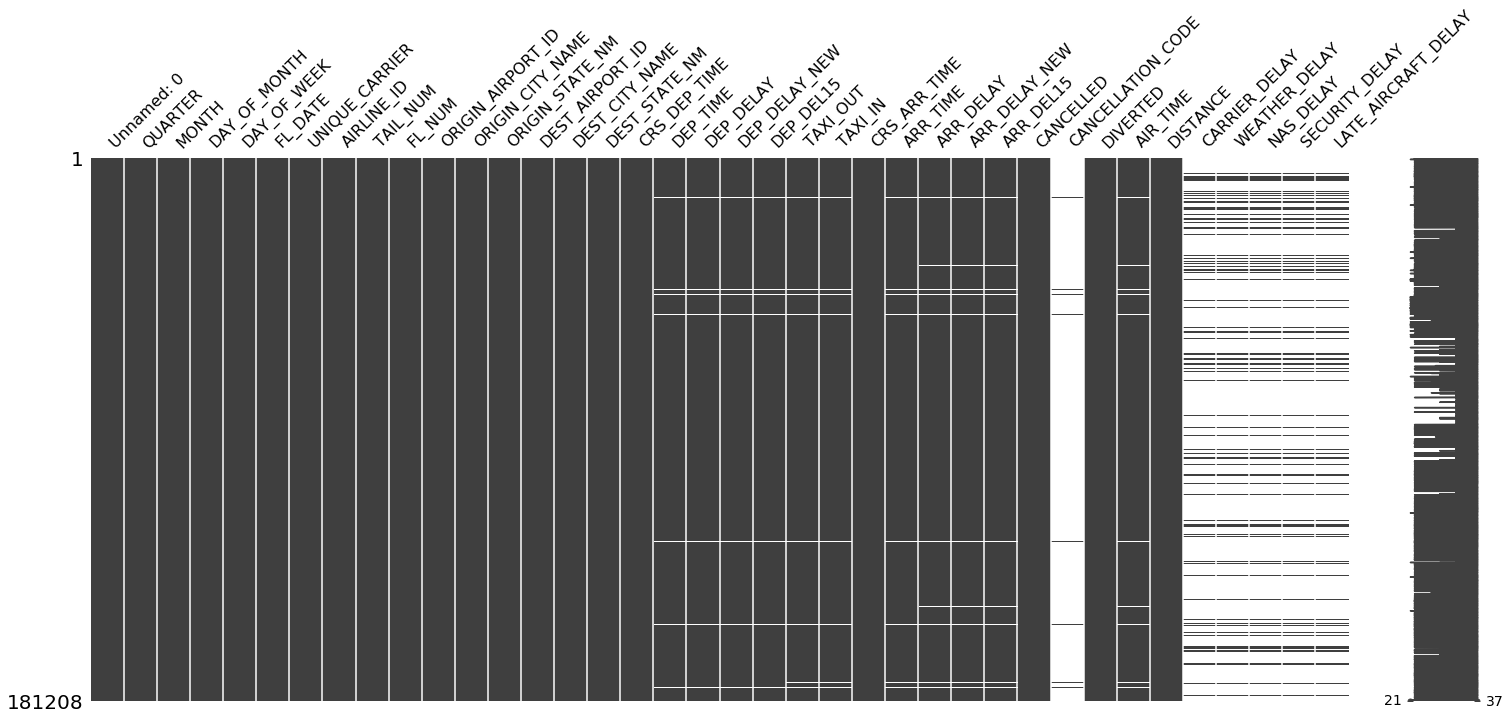

In [6]:
#This code was adopted from your notebooks
mn.matrix(df_dfw.sort_values(by=["Unnamed: 0",]))

#The code is from the class code, we modified the sorted valus inside the bracket.

After visualizing missing data, according to the plot above, there exist a large number of missing values in the feature "Cancellation_Code". Since cancelled flights are not our interest, we eliminate all cancelled flights data, where the feature CANCELLED is recorded as "0."

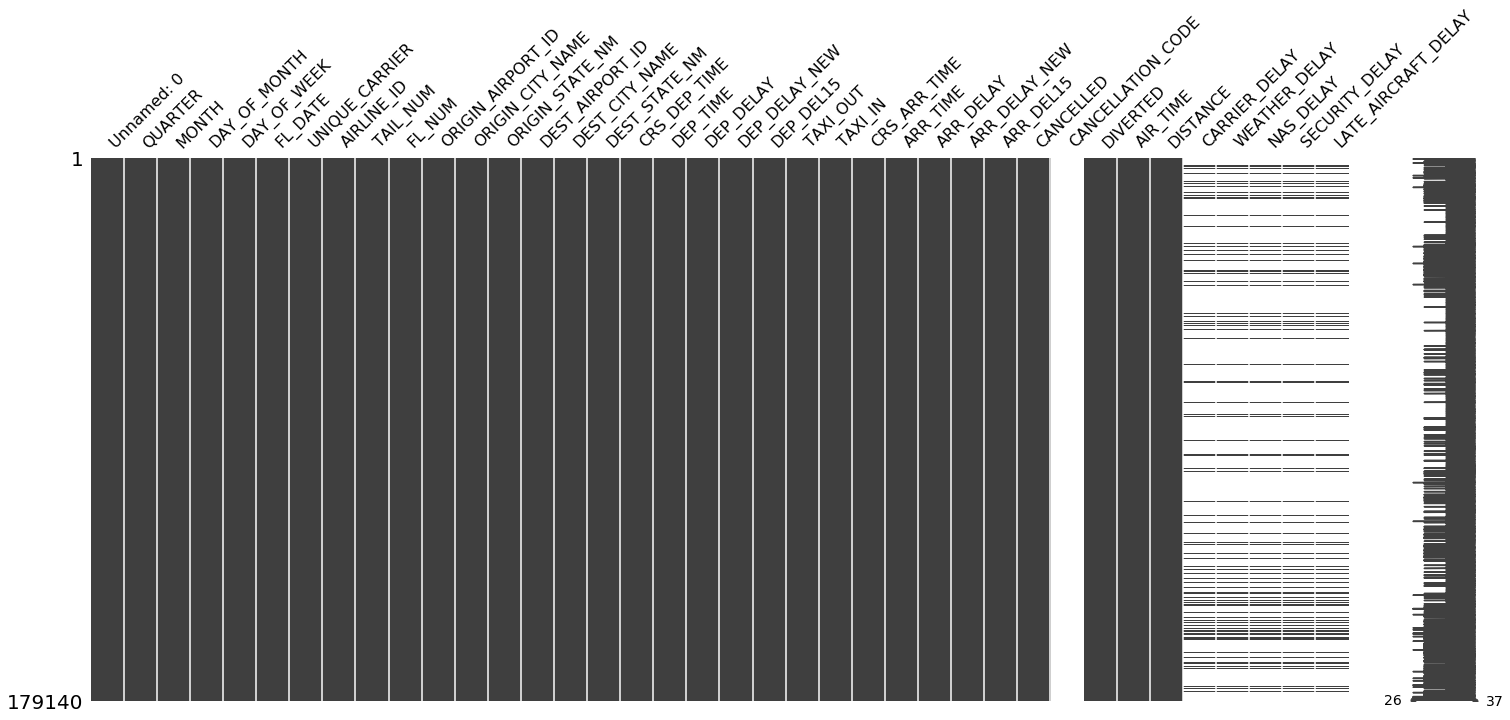

In [7]:
#This code was adopted from your notebooks
df_dfw_uncancelled = df_dfw[df.CANCELLED != 1]
mn.matrix(df_dfw_uncancelled.sort_values(by=["Unnamed: 0",]))

Although most columns seem to have no missing value, there are still a couple features contain small number of missing data. In order to complete this cleaning process, we sum up the number of the missing value under each column to find the most uncomplete ones.

In [8]:
print(df_dfw_uncancelled.isnull().sum())

Unnamed: 0                  0
QUARTER                     0
MONTH                       0
DAY_OF_MONTH                0
DAY_OF_WEEK                 0
FL_DATE                     0
UNIQUE_CARRIER              0
AIRLINE_ID                  0
TAIL_NUM                    0
FL_NUM                      0
ORIGIN_AIRPORT_ID           0
ORIGIN_CITY_NAME            0
ORIGIN_STATE_NM             0
DEST_AIRPORT_ID             0
DEST_CITY_NAME              0
DEST_STATE_NM               0
CRS_DEP_TIME                0
DEP_TIME                    0
DEP_DELAY                   0
DEP_DELAY_NEW               0
DEP_DEL15                   0
TAXI_OUT                    0
TAXI_IN                    34
CRS_ARR_TIME                0
ARR_TIME                   34
ARR_DELAY                 532
ARR_DELAY_NEW             532
ARR_DEL15                 532
CANCELLED                   0
CANCELLATION_CODE      179140
DIVERTED                    0
AIR_TIME                  532
DISTANCE                    0
CARRIER_DE

STEP 1:

There are 34 missing value under the "TAXI_IN" and "ARR_TIME" column.  Since ARRIVAL_TIME should not have any association with TAXI_IN time, these missing value are more than likely mistaken, such as loss of information while collecting. Since 34 observation is only a tiny fraction of a dataset that is nearly 180K count, we are not loosing that much information with removin the. Therefore, these observations are decided to be eliminated. (Method = Elimination)

In [9]:
# Clear these 34 missing value under TAXI_IN column
df_dfw_uncancelled_1 = df_dfw_uncancelled[df_dfw_uncancelled['TAXI_IN'].notnull()]
print(df_dfw_uncancelled_1.isnull().sum())

Unnamed: 0                  0
QUARTER                     0
MONTH                       0
DAY_OF_MONTH                0
DAY_OF_WEEK                 0
FL_DATE                     0
UNIQUE_CARRIER              0
AIRLINE_ID                  0
TAIL_NUM                    0
FL_NUM                      0
ORIGIN_AIRPORT_ID           0
ORIGIN_CITY_NAME            0
ORIGIN_STATE_NM             0
DEST_AIRPORT_ID             0
DEST_CITY_NAME              0
DEST_STATE_NM               0
CRS_DEP_TIME                0
DEP_TIME                    0
DEP_DELAY                   0
DEP_DELAY_NEW               0
DEP_DEL15                   0
TAXI_OUT                    0
TAXI_IN                     0
CRS_ARR_TIME                0
ARR_TIME                    0
ARR_DELAY                 498
ARR_DELAY_NEW             498
ARR_DEL15                 498
CANCELLED                   0
CANCELLATION_CODE      179106
DIVERTED                    0
AIR_TIME                  498
DISTANCE                    0
CARRIER_DE

STEP 2:

There were 498 observations that have missing value under "ARR_DELAY", "ARR_DELAY_NEW","ARR_DEL15", and "AIR_TIME"(ARR_DELAY is associated with other three varialbes. Thus, missing value on "ARR_DELAY" would cause missing on other columns). There were not mistakes. The reason of missing might be the lossing of information. 498 is less than 0.3% of the total observation. Thus, we decided to eliminate those missing value observations. (Method = Elimination)

In [10]:
# Clear these 498 missing value under ARR_DELAY column
df_dfw_uncancelled_2 = df_dfw_uncancelled_1[df_dfw_uncancelled_1['ARR_DELAY'].notnull()]
print(df_dfw_uncancelled_2.isnull().sum())

Unnamed: 0                  0
QUARTER                     0
MONTH                       0
DAY_OF_MONTH                0
DAY_OF_WEEK                 0
FL_DATE                     0
UNIQUE_CARRIER              0
AIRLINE_ID                  0
TAIL_NUM                    0
FL_NUM                      0
ORIGIN_AIRPORT_ID           0
ORIGIN_CITY_NAME            0
ORIGIN_STATE_NM             0
DEST_AIRPORT_ID             0
DEST_CITY_NAME              0
DEST_STATE_NM               0
CRS_DEP_TIME                0
DEP_TIME                    0
DEP_DELAY                   0
DEP_DELAY_NEW               0
DEP_DEL15                   0
TAXI_OUT                    0
TAXI_IN                     0
CRS_ARR_TIME                0
ARR_TIME                    0
ARR_DELAY                   0
ARR_DELAY_NEW               0
ARR_DEL15                   0
CANCELLED                   0
CANCELLATION_CODE      178608
DIVERTED                    0
AIR_TIME                    0
DISTANCE                    0
CARRIER_DE

STEP 3:

Since there is no cancelled flight information concerned with the purpose of this prediction, the CANCELLATION_CODE feature is determined to be completely eliminated.

STEP 4:

Due to the industry practice of 15 minutes of more delay is considered as flight delay, the majority of data are empty under columns CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, and LATE_AIRCRAFT_DELAY. These data are determined to be left alone, neither to be imputed nor eliminated.

In [11]:
# Check how many flights were not consider as delay (delay mins <=15)
df_dfw_uncancelled_2[df_dfw_uncancelled_2['ARR_DEL15'] ==0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149363 entries, 1 to 984915
Data columns (total 38 columns):
Unnamed: 0             149363 non-null int64
QUARTER                149363 non-null int64
MONTH                  149363 non-null int64
DAY_OF_MONTH           149363 non-null int64
DAY_OF_WEEK            149363 non-null int64
FL_DATE                149363 non-null datetime64[ns]
UNIQUE_CARRIER         149363 non-null object
AIRLINE_ID             149363 non-null int64
TAIL_NUM               149363 non-null object
FL_NUM                 149363 non-null int64
ORIGIN_AIRPORT_ID      149363 non-null int64
ORIGIN_CITY_NAME       149363 non-null object
ORIGIN_STATE_NM        149363 non-null object
DEST_AIRPORT_ID        149363 non-null int64
DEST_CITY_NAME         149363 non-null object
DEST_STATE_NM          149363 non-null object
CRS_DEP_TIME           149363 non-null int64
DEP_TIME               149363 non-null float64
DEP_DELAY              149363 non-null float64
DEP_DELAY_NEW  

Now, we start converting Arrival delay to three categories: "early" (delay<0 mins), "on time" (0 < delay < 15 mins), and "late" (delay > 15 mins).

In [12]:
#re-define the variable df_dfw_uncancelled so that it is easy to use in the future
df_dfw_uncancelled = df_dfw_uncancelled_2 

# add a new column to the data where defines the flight status
df_dfw_uncancelled['Status'] =pd.cut(df_dfw_uncancelled['ARR_DELAY'],[-1e6,0,15,1e6],labels=['early','on_time','late'])


The ratio of each flights status

the percentage of early fligtis 67.8553032338977 %
the percentage of on time fligtis 16.37160709486697 %
the percentage of late fligtis 15.77308967123533 %


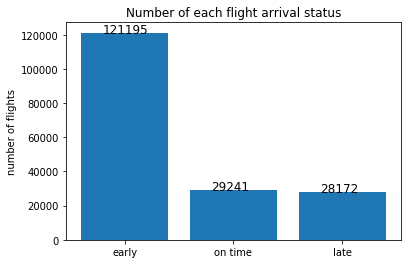

In [13]:
df_grouped = df_dfw_uncancelled.groupby(by=['Status']).count()
df_grouped = df_grouped['Unnamed: 0']
status = ('early','on time','late')
plt.bar(status,df_grouped[:])
plt.ylabel("number of flights")
plt.title('Number of each flight arrival status')
for i in range(len(df_grouped[:])):
    plt.text(x = i-0.2, y = df_grouped[i], s = df_grouped[i], size = 12)
    
    print("the percentage of", status[i], "fligtis",df_grouped[i]/sum(df_grouped)*100, '%')



As we explained in the lab 1, the cancellation code is useless since we are focusing on the uncancelled flight. Thus, we drop the cancellation_code. Also, Due to the industry practice of 15 minutes of more delay is considered as flight delay, the majority of data are empty under columns CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, and LATE_AIRCRAFT_DELAY. These data are determined to be left alone, neither to be imputed nor eliminated.

We get rid of the Tail number (TAIL_NUM) though certain delay may caused by defected airplanes (they may purhcase new planes or destroy these old planes). 

We drop the Flight number (FL_NUM) because flight number may change by certain period. We get rid of flight date (FL_DATE) because it is a duplicated info in our table data. 

Since we are keeping the carrrier name, we drop the airline ID column (AIRLINE_ID). 

We get rid of all delay info except the depature delay(CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY, ARR_DELAY, ARR_DELAY_NEW, ARR_DEL15) becuase the machine can easily tell that the flight is clasified as a delay once there is a positive input on these delay, and anything associates with arrival delay is summarized udner status.

We drop the column 'Quarter' (QUARTER) since 'Month' is giving us more information.

We drop the column 'Origin Airport ID' (ORIGIN_AIRPORT_ID), the column 'Origin state name' (ORIGIN_STATE_NM), the column 'Destination Airport ID' (DEST_AIRPORT_ID), the column 'Destination state name' (DEST_STATE_NM).

Since we do not have that much information about taxis, we drop column "Taxi in" and "Taxi out" (TAXI_OUT, TAXI_IN).

We drop (CANCELLED) and (DIVERTED) since they do not affect the arrival delay we try to classify.

We drop (DEP_DELAY), (DEP_DELAY_NEW), and (DEP_DEL15) since we cannot have these information before we sell the ticket.

We get rid of (DEP_TIME) and (ARR_TIME) since we cannot tell the actual departure and arrival time when we sell the ticket.

(Unnamed: 0) is useless so we drop it.

In [14]:
df_dfw_uncancelled = df_dfw_uncancelled.drop(['CANCELLATION_CODE','TAIL_NUM','FL_NUM','FL_DATE','AIRLINE_ID','CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY'
                                     ,'SECURITY_DELAY','LATE_AIRCRAFT_DELAY','ARR_DELAY','ARR_DELAY_NEW','ARR_DEL15','ORIGIN_AIRPORT_ID'
                                      , 'ORIGIN_STATE_NM','DEST_AIRPORT_ID','DEST_STATE_NM', 'QUARTER','TAXI_OUT','TAXI_IN','CANCELLED'
                                     ,'DIVERTED', 'DEP_DELAY_NEW', 'DEP_DEL15','DEP_DELAY', 'DEP_TIME','ARR_TIME','Unnamed: 0'],axis = 1)


By doing some feature engineering, since spped can capture both the distance and air time features. Thus, we create a variable called "Speed", and drop (DISTANCE) and (AIRTIME).

In [15]:
df_dfw_uncancelled['SPEED'] = df_dfw_uncancelled['DISTANCE']/df_dfw_uncancelled['AIR_TIME']*60
df_dfw_uncancelled =  df_dfw_uncancelled.drop(['DISTANCE', 'AIR_TIME'], axis = 1)

Rescale the speed variable from range 0 to 1 using max_min calculation.

In [16]:
df_dfw_uncancelled['SPEED'] = (df_dfw_uncancelled['SPEED']-df_dfw_uncancelled['SPEED'].min())/(df_dfw_uncancelled['SPEED'].max()-df_dfw_uncancelled["SPEED"].min())

Since we know the destination is DFW, we drop the DEST_CITY_NAME column.

In [17]:
df_dfw_uncancelled = df_dfw_uncancelled.drop(['DEST_CITY_NAME'], axis = 1)

Categorized the time variables.

In [18]:
df_dfw_uncancelled["CRS_DEP_TIME"] = pd.cut(df_dfw_uncancelled["CRS_DEP_TIME"],[0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,
                                                           1600,1700,1800,1900,2000,2100,2200,2300,2400], labels=[0,1,2,3,4,5,6,
                                                                                                                 7,8,9,10,11,12,
                                                                                                                 13,14,15,16,17,
                                                                                                                 18,19,20,21,22,
                                                                                                                 23])


df_dfw_uncancelled["CRS_ARR_TIME"] = pd.cut(df_dfw_uncancelled["CRS_ARR_TIME"],[0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,
                                                           1600,1700,1800,1900,2000,2100,2200,2300,2400], labels=[0,1,2,3,4,5,6,
                                                                                                                 7,8,9,10,11,12,
                                                                                                                 13,14,15,16,17,
                                                                                                                 18,19,20,21,22,
                                                                                                                 23])

In [19]:
df_dfw_uncancelled

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,ORIGIN_CITY_NAME,CRS_DEP_TIME,CRS_ARR_TIME,Status,SPEED
1,1,18,3,AS,"Portland, OR",9,15,on_time,0.554582
5,1,18,3,AS,"Seattle, WA",6,12,on_time,0.536025
6,1,18,3,AS,"Seattle, WA",23,5,on_time,0.536025
7,1,18,3,AS,"Seattle, WA",13,18,late,0.563210
17,1,19,4,AS,"Portland, OR",9,15,late,0.587948
21,1,19,4,AS,"Seattle, WA",6,12,on_time,0.570343
22,1,19,4,AS,"Seattle, WA",23,5,early,0.566759
23,1,19,4,AS,"Seattle, WA",13,18,early,0.570343
35,1,20,5,AS,"Portland, OR",9,15,early,0.572740
39,1,20,5,AS,"Seattle, WA",6,12,early,0.573963


## 2.5 Final data description

The final dataset has 9 columns, which are MONTH, DAY_OF_MONTH, DAY_OF_WEEK, UNIQUE_CARRIER, ORIGIN_CITY_NAME,CRS_DEP_TIME	CRS_ARR_TIME,Status and SPEED. Speed is the only continuous varialbe and it is normalized value of distance divided by flight time. Status is the target varialbe, and it is determined by the level of delay (delay < 0 mins = arrive early, 0 < delay < 15 = on time, > 15 = delay).

<i><b>[10 points]</b> Identify groups of features in your data that should be combined into cross-product features. Provide justification for why these features should be crossed (or why some features should not be crossed).</i>

## 2.6 Cross-product features identification

For our data set, we think that the interaction between the day of the week and the carrier might be useful, for example, some airlines have busy schedule on certain days, so that causes delay.
Also the week of the day and the origin city migh be useful. For example on a specific day of the week, the flights from a specific destination is always late

Two crossed features including DAY_OF_WEEK_UNIQUE_CARRIER, DAY_OF_WEEK_ORIGIN_CITY_NAME are generated in this section. We believe that Day of week and carrier are related. For instance some carriers have flights in a specific days of week and we can find out list carriers according day of week, also day of week and origin city name are also related e.g. from all flights from some cities are in specific day of week or in some days of week there we have flight specific origins. Therefore we believe these features are related and crossing them would help our network to memorize these relations to improve quality of our prediction.

In [20]:
df_dfw_uncancelled['CRS_DEP_TIME'] = df_dfw_uncancelled['CRS_DEP_TIME'].astype(object)
df_dfw_uncancelled['CRS_ARR_TIME'] = df_dfw_uncancelled['CRS_ARR_TIME'].astype(object)
df_dfw_uncancelled['DAY_OF_WEEK'] = df_dfw_uncancelled['DAY_OF_WEEK'].astype(object)
df_dfw_uncancelled['DAY_OF_MONTH'] = df_dfw_uncancelled['DAY_OF_MONTH'].astype(object)
df_dfw_uncancelled['MONTH'] = df_dfw_uncancelled['MONTH'].astype(object)

df_dfw_uncancelled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178608 entries, 1 to 984915
Data columns (total 9 columns):
MONTH               178608 non-null object
DAY_OF_MONTH        178608 non-null object
DAY_OF_WEEK         178608 non-null object
UNIQUE_CARRIER      178608 non-null object
ORIGIN_CITY_NAME    178608 non-null object
CRS_DEP_TIME        178608 non-null object
CRS_ARR_TIME        178608 non-null object
Status              178608 non-null category
SPEED               178608 non-null float64
dtypes: category(1), float64(1), object(7)
memory usage: 12.4+ MB


In [21]:
from sklearn.model_selection import StratifiedShuffleSplit
df = df_dfw_uncancelled

y = df[['Status']]
X = df.drop(['Status'], axis=1)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, stratify=y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(142886, 8)
(142886, 1)
(35722, 8)
(35722, 1)


In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


# define objects that can encode each variable as integer    
encoders = dict() 
categorical_headers = ['MONTH','DAY_OF_MONTH','DAY_OF_WEEK',
                       'UNIQUE_CARRIER','ORIGIN_CITY_NAME','CRS_DEP_TIME','CRS_ARR_TIME']
#label encode the response variable
tmp = LabelEncoder()
y_train = tmp.fit_transform(y_train)
#print (y_train.shape)
y_test = tmp.transform(y_test)
# train all encoders (special case the target 'income')
for col in categorical_headers:
   
    # integer encoded variables
    encoders[col] = LabelEncoder() # save the encoder
    X_train[col+'_int'] = encoders[col].fit_transform(X_train[col])
    X_test[col+'_int'] = encoders[col].transform(X_test[col])

# scale the numeric, continuous variables
numeric_headers = ["SPEED"]

for col in numeric_headers:
    X_train[col] = X_train[col].astype(np.float)
    X_test[col] = X_test[col].astype(np.float)
    
    ss = StandardScaler()
    X_train[col] = ss.fit_transform(X_train[col].values.reshape(-1, 1))
    X_test[col] = ss.transform(X_test[col].values.reshape(-1, 1))
    
#let's start modeling, grab the indecies of the labeled columns
categorical_headers_ints = [x+'_int' for x in categorical_headers]
#let's put them all in one variable
feature_cols = categorical_headers_ints + numeric_headers
X_train_num =  X_train[numeric_headers].values
X_test_num = X_test[numeric_headers].values


    
X_test.head()


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,ORIGIN_CITY_NAME,CRS_DEP_TIME,CRS_ARR_TIME,SPEED,MONTH_int,DAY_OF_MONTH_int,DAY_OF_WEEK_int,UNIQUE_CARRIER_int,ORIGIN_CITY_NAME_int,CRS_DEP_TIME_int,CRS_ARR_TIME_int
438056,11,13,1,AA,"San Antonio, TX",7,9,-1.893148,10,12,0,0,105,6,9
772107,5,2,2,AA,"Miami, FL",9,11,-0.162558,4,1,1,0,72,8,11
781499,5,13,6,AA,"Los Angeles, CA",6,12,1.113875,4,12,5,0,66,5,12
896239,6,9,5,B6,"Boston, MA",6,9,0.420267,5,8,4,2,13,5,9
104847,2,20,1,AA,"Las Vegas, NV",8,13,1.241415,1,19,0,0,61,7,13


## Modeling

<i><b>[20 points]</b> Create several combined wide and deep networks to classify your data using Keras. Visualize the performance of the network on the training data and validation data in the same plot versus the training iterations. Note: use the "history" return parameter that is part of Keras "fit" function to easily access this data.</i>

Functions wide_and_deep1_layer1 and wide_and_deep1_layer2 are the first architecture with variation in number of layers. Similarly, functions wide_and_deep2_layer1 and wide_and_deep2_layer2 are the second architecture with varion in number of layers. History of the fit function is used to visualize performance of these networks.

In [23]:
from sklearn import metrics as mt
import keras

keras.__version__

Using TensorFlow backend.


'2.2.4'

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Input, Dropout
from keras.layers import Embedding, Flatten, concatenate
from keras.models import Model
from sklearn import metrics as mt
from sklearn.preprocessing import OneHotEncoder

# Data Evaluation

## Metrics measurement

**Which method/ratio?**

There are two type of scenarios we mainly concern with. From the AA's perspective, any on time flight we predict as delay flight will decrease the owner's profit (because these tickets will be discounted), and any delay flight we predict as on time flight will lower the customer's loyalty (customers get charged the same with worse experience). In order to fix the first issue, we need to calculate the recall for the confusion matrix. For the second issue, we need to calculate the precision. Thus, to balance these two ratios, we decide to calculate the **f1-score** since it is a weighted average(also known as harmonic average)of recall and precission for our model.
F1 score is usually only for the binary case, where in our dataset, we have a multiclass problem. so to solve this, we have to aggregate the scores over each class. There are 2 ways to do this **micro** is calculated for the individual TPs, TNs, FPs, FNs of the confusion matrix, it is useful when we want to weight each instance equally where the **macro** is calculated as the average scores of the confusion matrix, it weights classes equally to evaluate the overall performance og an algorithm with regards to the most frequent class labels.

F1 is usually a binary evaluation metrics, when we use it to evaluate multiclass classification models in sklearn, a weighted variant of the macro-average is used by default, the weighted macro-average is calculated by weighting the score of each class label by the number of true instances when calculating the average. Thus the weighted macro-average is useful if we are dealing with class imbalance, which is our case, so that's why we are choosing the F1 weighted macro-average score.

$$F1_{micro} = 2\times \frac {PREC_1 \times REC_1 + ... + PREC_n \times REC_n} {PREC_1 + REC_1 +  ... + PREC_n + REC_n} $$

$$F1_{macro} = 2\times \frac {F1_1 + F1_2 + ... F1_n} {n} $$

**Why not accuracy score?**

Since we are trying to attract more customers, the prediction of our algorithm should be as "accurate" as possible. The ratio of desire flight is (arrive on time and arrive early) more than 84%. Thus, the algorithm will achieve good performance if it predict every flight arrive early (under the statistical aspect, it only has 65% accuracy. But under the business aspect, early arrival can be consider as on time arrival). 
And since our data exists a class imbalance problem, accuracy score is not a good choice.


## Cross Validation method

Our data set is unique, since it has a time series effect, and it has class imbalance problem in it. Since time series is out of the scope of this lab and we want to make our life easier, we will just deal with the class imbalance problem and assume that there is no time series effect, which means that the flight delays are independent of each other and the delay of a specific flight doesn't give any additional information of the delay of any other flight. But realistically this assumption is totally fine, since the flights are mainly delayed because of the security, aircraft, and airlne delays from the origin and rarely from the destinantion. so we think it's a very rasonable assumption to take.


For the method of dividing the training and testing data, we believe this is the most important key for a succesful deployment of a machine learning algorithm, since there is alot of data now a day, any machine learning project will be trained on a sample of the desired population. assuming that the sample is representitve of the population, we want to make sure we are learning from the data not memorizing! in order to expplain this, let's assume a situation where in a machine learning class the students have a midterm and the professor has given the students 3 page notes that summarizes what will be in the midterm. If the midterm is exactly from the 3 page notes, that is what we call overfit(low bias, high variance). if it's completely different they will have a simple approach and that underfit(low variance, high bias). if it's some how similar to the notes but different at the same time, we will have a perfect fit(sweet spot of the bias variance tradeoff)! this is a really good visualization of the situation we described



<img src="https://raw.githubusercontent.com/M-Elsaied/NYC-Taxi-Analysis/master/data/Visualization/fitting.png" alt="FittingCurves" width="800" height="600" title="FittingCurves">

So what we want is to help the algorithm to understand the data and not memorize it, so if we do a simple train, test split the model can overfit or underfit, depending on what is in the training set.

In order to solve the bias-variance trade off we can use the Kfold cross validation, which sample without replacment into Kfolds and thus have k-1 train and the test set would be the kth fold and then can run k models on the k folds and then take the average of these models, this way we have a stable, and consistent model(It's the same idea of ensembles, but the only difference that it aggregates the same model on different folds of the data by thaking the average and it usually decreases the variance)!
Beside that, it's a really powerful tool for the hyperparameters tuning via grid search.

For the number of K folds, it's a bias-variance tradeoff where after alot of simulations by Trevor Hestie & Rob Tibsharani, it appears that k between 5 and 10 is the best number as shown in the figure below(figure from ISL chapter 5)

<img src="https://raw.githubusercontent.com/M-Elsaied/NYC-Taxi-Analysis/master/data/Visualization/kfold.PNG" alt="FittingCurves" width="600" height="400" title="FittingCurves">

There is also emperical evidence that shows a good standard for value of k is 10, where experiments by Ron Kohavi on various real-world datasets suggest the 10-fold cross-validation offers the best bias-variance tradeoff.

Given all of this we have choosen 4-fold stratified cross validation due to computational limitation.


In [25]:
from keras import backend as K
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall
    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

First we use simple architecture with only 2 layers in the combined wide and deep

In [26]:
#STEP 3 COMBINING CROSSED LINEAR CLASSIFIER AND DEEP EMBEDING
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

def wide_and_deep1_layer1(X_train,X_test,y_train,y_test,v=0,epo=1):
    X_train_num =  X_train[numeric_headers].values
    X_test_num = X_test[numeric_headers].values
    
    cross_columns = [['DAY_OF_WEEK','UNIQUE_CARRIER'],
                     ['DAY_OF_WEEK', 'ORIGIN_CITY_NAME']]

    #'workclass','education','marital_status','occupation','relationship','race','sex','country'

    # we need to create separate lists for each branch
    embed_branches = []
    X_ints_train = []
    X_ints_test = []
    all_inputs = []
    all_wide_branch_outputs = []

    for cols in cross_columns:
        # encode crossed columns as ints for the embedding
        enc = LabelEncoder()

        # create crossed labels
        X_crossed_train = X_train[cols].apply(lambda x: '_'.join(str(x)), axis=1, raw = True)
        X_crossed_test = X_test[cols].apply(lambda x: '_'.join(str(x)), axis=1, raw = True)

        enc.fit(np.hstack((X_crossed_train.values,  X_crossed_test.values)))
        X_crossed_train = enc.transform(X_crossed_train)
        X_crossed_test = enc.transform(X_crossed_test)
        X_ints_train.append( X_crossed_train )
        X_ints_test.append( X_crossed_test )

        # get the number of categories
        N = max(X_ints_train[-1]+1) # same as the max(df_train[col])

        # create embedding branch from the number of categories
        inputs = Input(shape=(1,),dtype='int32', name = '_'.join(cols))
        all_inputs.append(inputs)
        x = Embedding(input_dim=N, 
                      output_dim=int(np.sqrt(N)), 
                      input_length=1, name = '_'.join(cols)+'_embed')(inputs)
        x = Flatten()(x)
        all_wide_branch_outputs.append(x)

    # merge the branches together
    wide_branch = concatenate(all_wide_branch_outputs, name='wide_concat')
    wide_branch = Dense(units=16,activation='relu',name='wide_combined')(wide_branch)

    # reset this input branch
    all_deep_branch_outputs = []
    # add in the embeddings
    for col in categorical_headers_ints:
        # encode as ints for the embedding
        X_ints_train.append( X_train[col].values )
        X_ints_test.append( X_test[col].values )

        # get the number of categories
        N = max(X_ints_train[-1]+1) # same as the max(df_train[col])

        # create embedding branch from the number of categories
        inputs = Input(shape=(1,),dtype='int32', name=col)
        all_inputs.append(inputs)
        x = Embedding(input_dim=N, 
                      output_dim=int(np.sqrt(N)), 
                      input_length=1, name=col+'_embed')(inputs)
        x = Flatten()(x)
        all_deep_branch_outputs.append(x)

    # also get a dense branch of the numeric features
    all_inputs.append(Input(shape=(X_train_num.shape[1],),
                            sparse=False,
                            name='numeric_data'))

    x = Dense(units=20, activation='relu',name='numeric_1')(all_inputs[-1])
    all_deep_branch_outputs.append( x )

    # merge the deep branches together
    deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
    deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
    deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)

    final_branch = concatenate([wide_branch, deep_branch],name='concat_deep_wide')
    final_branch = Dense(units=3,activation='softmax',name='combined')(final_branch)

    model = Model(inputs=all_inputs, outputs=final_branch)
    
    model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=[f1])

    # lets also add the history variable to see how we are doing
    # and lets add a validation set to keep track of our progress
    history = model.fit(X_ints_train+ [X_train_num],
                        y_train, 
                        epochs=epo, 
                        batch_size=32, 
                        verbose=v, 
                        validation_data = (X_ints_test + [X_test_num], y_test))
    
    pred = np.round(np.argmax(model.predict(X_ints_test + [X_test_num]),axis=1))
    #print(pred,y_test)
    
    c = f1_score(y_test, pred,average = 'weighted')
    
    return history,model,c,pred

Let's train the first model. This model has 33,311 variables and trained with 10 epochs. To reduce running time this model is trained in the ManeFrameII. Last two inputs of first model function are verbos and epoches. Outputs are history, model, cost, and prediction. In this part we are training the model with all the training data and testing with test data. We will use K-fold in the following parts.

This model includes seven embeddings layers for MONTH, DAY_OF_MONTH, DAY_OF_WEEK, UNIQUE_CARRIER, ORIGIN_CITY_NAME, CRS_DEP_TIME, and CRS_ARR_TIME. Two embeddings also are used for the crossed features including DAY_OF_WEEK_UNIQUE_CARRIER, DAY_OF_WEEK_ORIGIN_CITY_NAME. These features are used for crossing because we believe these features are related and crossing them would help our network to memorize these relations to improve quality of our prediction.

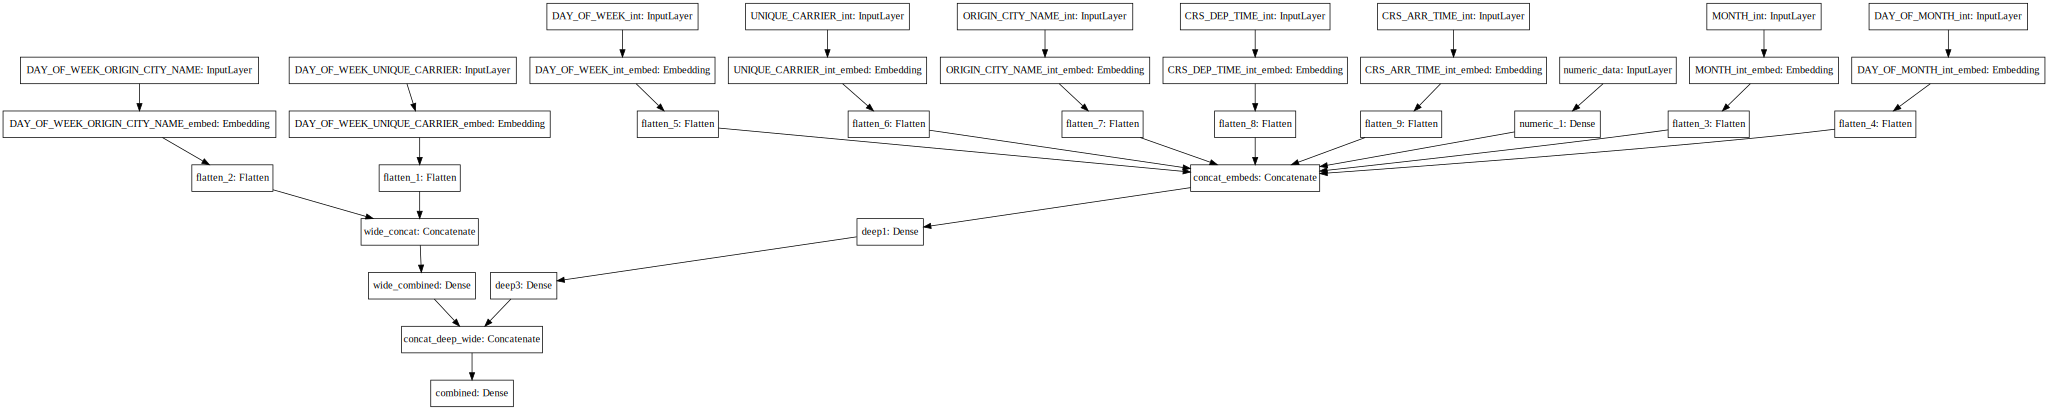

In [90]:

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

# you will need to install pydot properly on your machine to get this running
SVG(model_to_dot(model_1_layer1).create(prog='dot', format='svg'))

In [27]:
history_1_layer1,model_1_layer1,c_1_layer1,pred_1_layer1 = wide_and_deep1_layer1(X_train,X_test,y_train,y_test,1,10) # last two are verbose and epochs
model_1_layer1.summary()

Train on 142886 samples, validate on 35722 samples
Epoch 1/10
142886/142886 [==============================] - 33s 228us/step - loss: 0.7845 - f1: 0.5874 - val_loss: 0.7580 - val_f1: 0.6077
Epoch 2/10
142886/142886 [==============================] - 28s 196us/step - loss: 0.7539 - f1: 0.5963 - val_loss: 0.7522 - val_f1: 0.6156
Epoch 3/10
142886/142886 [==============================] - 27s 187us/step - loss: 0.7472 - f1: 0.5976 - val_loss: 0.7482 - val_f1: 0.6109
Epoch 4/10
142886/142886 [==============================] - 29s 206us/step - loss: 0.7422 - f1: 0.5989 - val_loss: 0.7478 - val_f1: 0.6066
Epoch 5/10
142886/142886 [==============================] - 29s 202us/step - loss: 0.7380 - f1: 0.5977 - val_loss: 0.7467 - val_f1: 0.6110
Epoch 6/10
142886/142886 [==============================] - 31s 218us/step - loss: 0.7349 - f1: 0.5991 - val_loss: 0.7440 - val_f1: 0.6015
Epoch 7/10
142886/142886 [==============================] - 28s 196us/step - loss: 0.7317 - f1: 0.5997 - val_loss: 

<i><b>[10 points]</b> Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. Argue why your cross validation method is a realistic mirroring of how an algorithm would be used in practice. </i>

In this part we have used Stratified K-fold for training the model. We are using 4-fold with shuffle because we believe our data is farely random and we have a good amount of data. We are limited to 4 fold due to computational limitations. We did use ManFrame II, however, it was computationally expensive. Increasing number of folds did not increase our mearement of success so it seems that 4 folds are enough. This method is appropriate for our data since in practice airlines have enough data to train the model and each fold has enough data to train the model. 

In [28]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics as mt

costs = []
kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=64)
#temp_x = X_train[feature_cols].values
#temp_x = X_ints_train+ [X_train_num]+X_ints_test + [X_test_num]
#temp_y = np.array(y_train)
#print (temp_y)
#temp_y = np.array(temp_y)
#print (temp_x.shape)
#print (temp_y.shape)
ref = 1
for train_idx, test_idx in kfold.split(X_train, y_train):
    print ('Now at step',ref,'in kfold ...')
    # build train and test samples from crossed cols and feature cols
    #print (y_train)
    
    X_train_temp = X_train.iloc[train_idx]
    y_train_temp = y_train[train_idx]
    X_test_temp = X_train.iloc[test_idx]
    y_test_temp = y_train[test_idx]
    
    #pred = np.argmax(model.predict(X_test_temp), axis=1)
    
    # take cost
    history,model,c,pred = wide_and_deep1_layer1(X_train_temp,X_test_temp,y_train_temp,y_test_temp,0,10) # last two are verbose and epochs
    costs.append(c)
    
    
    # print confusion matrix
    print(mt.confusion_matrix(y_test_temp,pred), "=>", c)
    ref+=1

print(costs)

Now at step 1 in kfold ...
[[23554   405   280]
 [ 4046  1303   286]
 [ 4761   526   562]] => 0.6433524780013525
Now at step 2 in kfold ...
[[23088   490   661]
 [ 3865  1343   426]
 [ 4357   566   925]] => 0.655338345534027
Now at step 3 in kfold ...
[[23374   414   451]
 [ 3887  1349   398]
 [ 4661   448   739]] => 0.6516149111952052
Now at step 4 in kfold ...
[[23455   249   535]
 [ 4118  1032   484]
 [ 4641   300   907]] => 0.6471785724794505
[0.6433524780013525, 0.655338345534027, 0.6516149111952052, 0.6471785724794505]


We now add one more layer with 30 units to check the performance.

In [31]:
#STEP 3 COMBINING CROSSED LINEAR CLASSIFIER AND DEEP EMBEDING
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

def wide_and_deep1_layer2(X_train,X_test,y_train,y_test,v=0,epo=1):
    X_train_num =  X_train[numeric_headers].values
    X_test_num = X_test[numeric_headers].values
    
    cross_columns = [['DAY_OF_WEEK','UNIQUE_CARRIER'],
                     ['DAY_OF_WEEK', 'ORIGIN_CITY_NAME']]

    #'workclass','education','marital_status','occupation','relationship','race','sex','country'

    # we need to create separate lists for each branch
    embed_branches = []
    X_ints_train = []
    X_ints_test = []
    all_inputs = []
    all_wide_branch_outputs = []

    for cols in cross_columns:
        # encode crossed columns as ints for the embedding
        enc = LabelEncoder()

        # create crossed labels
        X_crossed_train = X_train[cols].apply(lambda x: '_'.join(str(x)), axis=1, raw = True)
        X_crossed_test = X_test[cols].apply(lambda x: '_'.join(str(x)), axis=1, raw = True)

        enc.fit(np.hstack((X_crossed_train.values,  X_crossed_test.values)))
        X_crossed_train = enc.transform(X_crossed_train)
        X_crossed_test = enc.transform(X_crossed_test)
        X_ints_train.append( X_crossed_train )
        X_ints_test.append( X_crossed_test )

        # get the number of categories
        N = max(X_ints_train[-1]+1) # same as the max(df_train[col])

        # create embedding branch from the number of categories
        inputs = Input(shape=(1,),dtype='int32', name = '_'.join(cols))
        all_inputs.append(inputs)
        x = Embedding(input_dim=N, 
                      output_dim=int(np.sqrt(N)), 
                      input_length=1, name = '_'.join(cols)+'_embed')(inputs)
        x = Flatten()(x)
        all_wide_branch_outputs.append(x)

    # merge the branches together
    wide_branch = concatenate(all_wide_branch_outputs, name='wide_concat')
    wide_branch = Dense(units=16,activation='relu',name='wide_combined')(wide_branch)

    # reset this input branch
    all_deep_branch_outputs = []
    # add in the embeddings
    for col in categorical_headers_ints:
        # encode as ints for the embedding
        X_ints_train.append( X_train[col].values )
        X_ints_test.append( X_test[col].values )

        # get the number of categories
        N = max(X_ints_train[-1]+1) # same as the max(df_train[col])

        # create embedding branch from the number of categories
        inputs = Input(shape=(1,),dtype='int32', name=col)
        all_inputs.append(inputs)
        x = Embedding(input_dim=N, 
                      output_dim=int(np.sqrt(N)), 
                      input_length=1, name=col+'_embed')(inputs)
        x = Flatten()(x)
        all_deep_branch_outputs.append(x)

    # also get a dense branch of the numeric features
    all_inputs.append(Input(shape=(X_train_num.shape[1],),
                            sparse=False,
                            name='numeric_data'))

    x = Dense(units=20, activation='relu',name='numeric_1')(all_inputs[-1])
    all_deep_branch_outputs.append( x )

    # merge the deep branches together
    deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
    deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
    deep_branch = Dense(units=30,activation='relu', name='deep2')(deep_branch)
    deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)

    final_branch = concatenate([wide_branch, deep_branch],name='concat_deep_wide')
    final_branch = Dense(units=3,activation='softmax',name='combined')(final_branch)

    model = Model(inputs=all_inputs, outputs=final_branch)
    
    model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=[f1])

    # lets also add the history variable to see how we are doing
    # and lets add a validation set to keep track of our progress
    history = model.fit(X_ints_train+ [X_train_num],
                        y_train, 
                        epochs=epo, 
                        batch_size=32, 
                        verbose=v, 
                        validation_data = (X_ints_test + [X_test_num], y_test))
    
    pred = np.round(np.argmax(model.predict(X_ints_test + [X_test_num]),axis=1))
    #print(pred,y_test)
    
    c = f1_score(y_test, pred,average = 'weighted')
    
    return history,model,c,pred

In [41]:
history_1_layer2,model_1_layer2,c_1_layer2,pred_1_layer2 = wide_and_deep1_layer2(X_train,X_test,y_train,y_test,1,10) # last two are verbose and epochs
model_1_layer2.summary()

Train on 142886 samples, validate on 35722 samples
Epoch 1/10
142886/142886 [==============================] - 38s 263us/step - loss: 0.7839 - f1: 0.5838 - val_loss: 0.7587 - val_f1: 0.5977
Epoch 2/10
142886/142886 [==============================] - 35s 247us/step - loss: 0.7519 - f1: 0.5893 - val_loss: 0.7492 - val_f1: 0.5860
Epoch 3/10
142886/142886 [==============================] - 34s 241us/step - loss: 0.7435 - f1: 0.5884 - val_loss: 0.7449 - val_f1: 0.5782
Epoch 4/10
142886/142886 [==============================] - 38s 266us/step - loss: 0.7376 - f1: 0.5916 - val_loss: 0.7431 - val_f1: 0.5815
Epoch 5/10
142886/142886 [==============================] - 36s 254us/step - loss: 0.7333 - f1: 0.5921 - val_loss: 0.7412 - val_f1: 0.5894
Epoch 6/10
142886/142886 [==============================] - 45s 313us/step - loss: 0.7289 - f1: 0.5932 - val_loss: 0.7389 - val_f1: 0.5903
Epoch 7/10
142886/142886 [==============================] - 49s 342us/step - loss: 0.7260 - f1: 0.5937 - val_loss: 

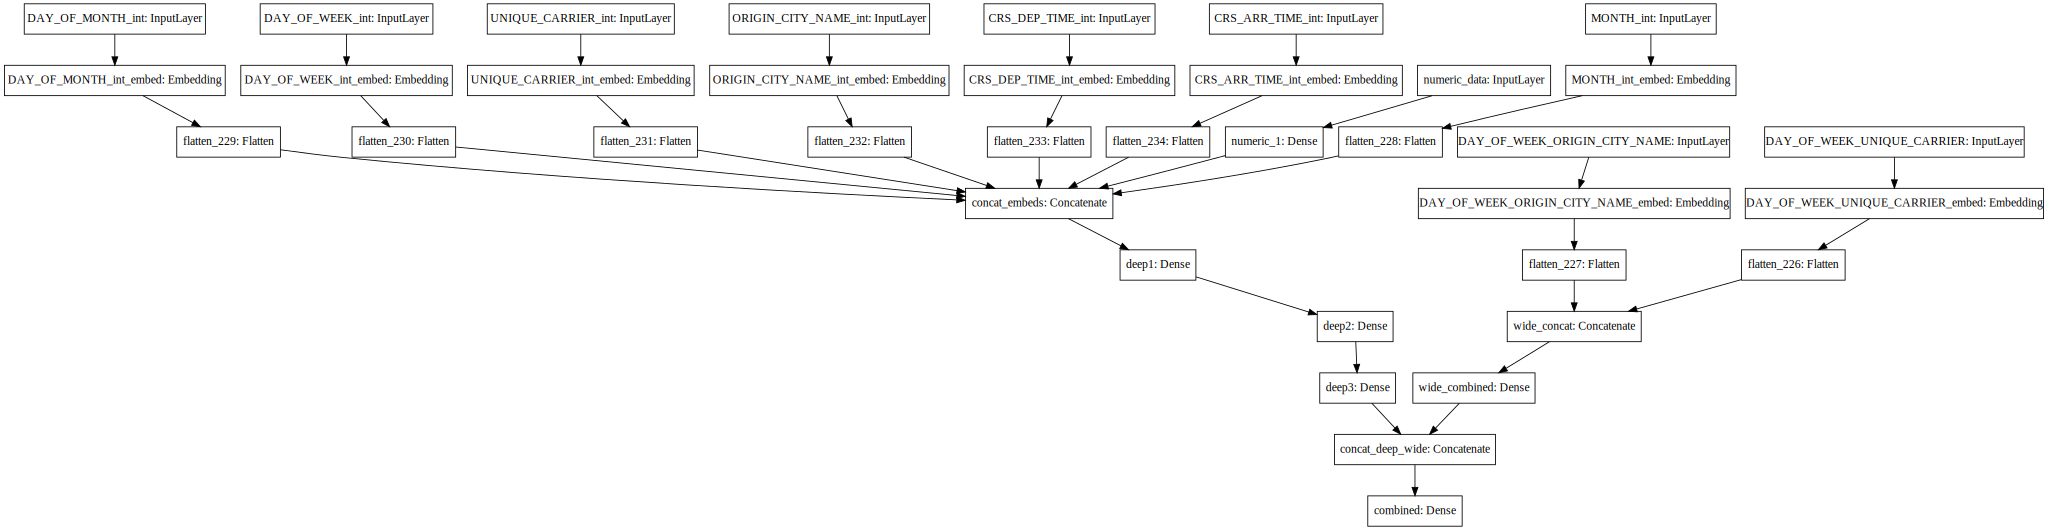

In [91]:

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

# you will need to install pydot properly on your machine to get this running
SVG(model_to_dot(model_1_layer2).create(prog='dot', format='svg'))

In [33]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics as mt

costs = []
kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=64)
#temp_x = X_train[feature_cols].values
#temp_x = X_ints_train+ [X_train_num]+X_ints_test + [X_test_num]
#temp_y = np.array(y_train)
#print (temp_y)
#temp_y = np.array(temp_y)
#print (temp_x.shape)
#print (temp_y.shape)
ref = 1
for train_idx, test_idx in kfold.split(X_train, y_train):
    print ('Now at step',ref,'in kfold ...')
    # build train and test samples from crossed cols and feature cols
    #print (y_train)
    
    X_train_temp = X_train.iloc[train_idx]
    y_train_temp = y_train[train_idx]
    X_test_temp = X_train.iloc[test_idx]
    y_test_temp = y_train[test_idx]
    
    #pred = np.argmax(model.predict(X_test_temp), axis=1)
    
    # take cost
    history,model,c,pred = wide_and_deep1_layer2(X_train_temp,X_test_temp,y_train_temp,y_test_temp,0,10) # last two are verbose and epochs
    costs.append(c)
    
    
    # print confusion matrix
    print(mt.confusion_matrix(y_test_temp,pred), "=>", c)
    ref+=1

print(costs)

Now at step 1 in kfold ...
[[23284   495   460]
 [ 3924  1365   346]
 [ 4576   529   744]] => 0.650607706061311
Now at step 2 in kfold ...
[[23183   560   496]
 [ 3877  1323   434]
 [ 4567   420   861]] => 0.6526600407956753
Now at step 3 in kfold ...
[[23509   363   367]
 [ 3977  1295   362]
 [ 4778   398   672]] => 0.6481300056244405
Now at step 4 in kfold ...
[[23651   191   397]
 [ 4200   998   436]
 [ 4836   242   770]] => 0.6422417312751275
[0.650607706061311, 0.6526600407956753, 0.6481300056244405, 0.6422417312751275]


This model includes seven embeddings layers for MONTH, DAY_OF_MONTH, DAY_OF_WEEK, UNIQUE_CARRIER, ORIGIN_CITY_NAME, CRS_DEP_TIME, and CRS_ARR_TIME. Two embeddings also are used for the crossed features including DAY_OF_WEEK_UNIQUE_CARRIER, DAY_OF_WEEK_ORIGIN_CITY_NAME. These features are used for crossing because we believe these features are related and crossing them would help our network to memorize these relations to improve quality of our prediction.

In addition, to the cross reference columns that we did in architecture 1, we will add 2 more crossed features DAY_OF_WEEK and MONTH to capture if there is a peak of number of flights in certain monthes(June,July,August) or at specific holidays (Thanks giving, Christmas) and the second added cross reference is with the DAY_OF_WEEK and CRS_ARR_TIME to capture the peak of flights at certain time of the day at a certain day of the week

### Second architecture 

In [34]:
#STEP 3 COMBINING CROSSED LINEAR CLASSIFIER AND DEEP EMBEDING

def wide_and_deep2_layer1(X_train,X_test,y_train,y_test,v=0,epo=1):
    X_train_num =  X_train[numeric_headers].values
    X_test_num = X_test[numeric_headers].values
    
    cross_columns = [['DAY_OF_WEEK','UNIQUE_CARRIER'],
                     ['DAY_OF_WEEK', 'ORIGIN_CITY_NAME'],
                     ['DAY_OF_WEEK', 'MONTH'],
                     ['DAY_OF_WEEK', 'CRS_ARR_TIME']]

    #'workclass','education','marital_status','occupation','relationship','race','sex','country'

    # we need to create separate lists for each branch
    embed_branches = []
    X_ints_train = []
    X_ints_test = []
    all_inputs = []
    all_wide_branch_outputs = []

    for cols in cross_columns:
        # encode crossed columns as ints for the embedding
        enc = LabelEncoder()

        # create crossed labels
        X_crossed_train = X_train[cols].apply(lambda x: '_'.join(str(x)), axis=1, raw=1)
        X_crossed_test = X_test[cols].apply(lambda x: '_'.join(str(x)), axis=1, raw=1)

        enc.fit(np.hstack((X_crossed_train.values,  X_crossed_test.values)))
        X_crossed_train = enc.transform(X_crossed_train)
        X_crossed_test = enc.transform(X_crossed_test)
        X_ints_train.append( X_crossed_train )
        X_ints_test.append( X_crossed_test )

        # get the number of categories
        N = max(X_ints_train[-1]+1) # same as the max(df_train[col])

        # create embedding branch from the number of categories
        inputs = Input(shape=(1,),dtype='int32', name = '_'.join(cols))
        all_inputs.append(inputs)
        x = Embedding(input_dim=N, 
                      output_dim=int(np.sqrt(N)), 
                      input_length=1, name = '_'.join(cols)+'_embed')(inputs)
        x = Flatten()(x)
        all_wide_branch_outputs.append(x)

    # merge the branches together
    wide_branch = concatenate(all_wide_branch_outputs, name='wide_concat')
    wide_branch = Dense(units=16,activation='relu',name='wide_combined')(wide_branch)

    # reset this input branch
    all_deep_branch_outputs = []
    # add in the embeddings
    for col in categorical_headers_ints:
        # encode as ints for the embedding
        X_ints_train.append( X_train[col].values )
        X_ints_test.append( X_test[col].values )

        # get the number of categories
        N = max(X_ints_train[-1]+1) # same as the max(df_train[col])

        # create embedding branch from the number of categories
        inputs = Input(shape=(1,),dtype='int32', name=col)
        all_inputs.append(inputs)
        x = Embedding(input_dim=N, 
                      output_dim=int(np.sqrt(N)), 
                      input_length=1, name=col+'_embed')(inputs)
        x = Flatten()(x)
        all_deep_branch_outputs.append(x)

    # also get a dense branch of the numeric features
    all_inputs.append(Input(shape=(X_train_num.shape[1],),
                            sparse=False,
                            name='numeric_data'))

    x = Dense(units=20, activation='relu',name='numeric_1')(all_inputs[-1])
    all_deep_branch_outputs.append( x )

    # merge the deep branches together
    deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
    deep_branch = Dense(units=100,activation='relu', name='deep1')(deep_branch)
    deep_branch = Dropout(0.2, seed=32)(deep_branch)
    deep_branch = Dense(units=50,activation='relu', name='deep2')(deep_branch)
    deep_branch = Dropout(0.4, seed=32)(deep_branch)
    deep_branch = Dense(units=25,activation='relu', name='deep3')(deep_branch)
    deep_branch = Dropout(0.6, seed=32)(deep_branch)
    deep_branch = Dense(units=10,activation='relu', name='deep4')(deep_branch)

    final_branch = concatenate([wide_branch, deep_branch],name='concat_deep_wide')
    final_branch = Dense(units=3,activation='softmax',name='combined')(final_branch)

    model = Model(inputs=all_inputs, outputs=final_branch)
    
    model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=[f1])

    # lets also add the history variable to see how we are doing
    # and lets add a validation set to keep track of our progress
    history = model.fit(X_ints_train+ [X_train_num],
                        y_train, 
                        epochs=epo, 
                        batch_size=32, 
                        verbose=v, 
                        validation_data = (X_ints_test + [X_test_num], y_test))
    
    pred = np.round(np.argmax(model.predict(X_ints_test + [X_test_num]),axis=1))
    #print(pred,y_test)
    
    c = f1_score(y_test, pred,average = 'weighted')
    
    return history,model,c,pred

In [36]:
history_2_layer1,model_2_layer1,c_2_layer1,pred_2_layer1 = wide_and_deep2_layer1(X_train,X_test,y_train,y_test,1,10) # last two are verbose and epochs
model_2_layer1.summary()

Train on 142886 samples, validate on 35722 samples
Epoch 1/10
142886/142886 [==============================] - 44s 306us/step - loss: 0.8016 - f1: 0.5691 - val_loss: 0.7628 - val_f1: 0.5780
Epoch 2/10
142886/142886 [==============================] - 46s 320us/step - loss: 0.7628 - f1: 0.5935 - val_loss: 0.7624 - val_f1: 0.5917
Epoch 3/10
142886/142886 [==============================] - 44s 304us/step - loss: 0.7538 - f1: 0.5992 - val_loss: 0.7579 - val_f1: 0.5911
Epoch 4/10
142886/142886 [==============================] - 51s 357us/step - loss: 0.7480 - f1: 0.6010 - val_loss: 0.7561 - val_f1: 0.6239
Epoch 5/10
142886/142886 [==============================] - 54s 375us/step - loss: 0.7435 - f1: 0.6054 - val_loss: 0.7565 - val_f1: 0.6041
Epoch 6/10
142886/142886 [==============================] - 55s 387us/step - loss: 0.7385 - f1: 0.6069 - val_loss: 0.7567 - val_f1: 0.5983
Epoch 7/10
142886/142886 [==============================] - 53s 373us/step - loss: 0.7347 - f1: 0.6119 - val_loss: 

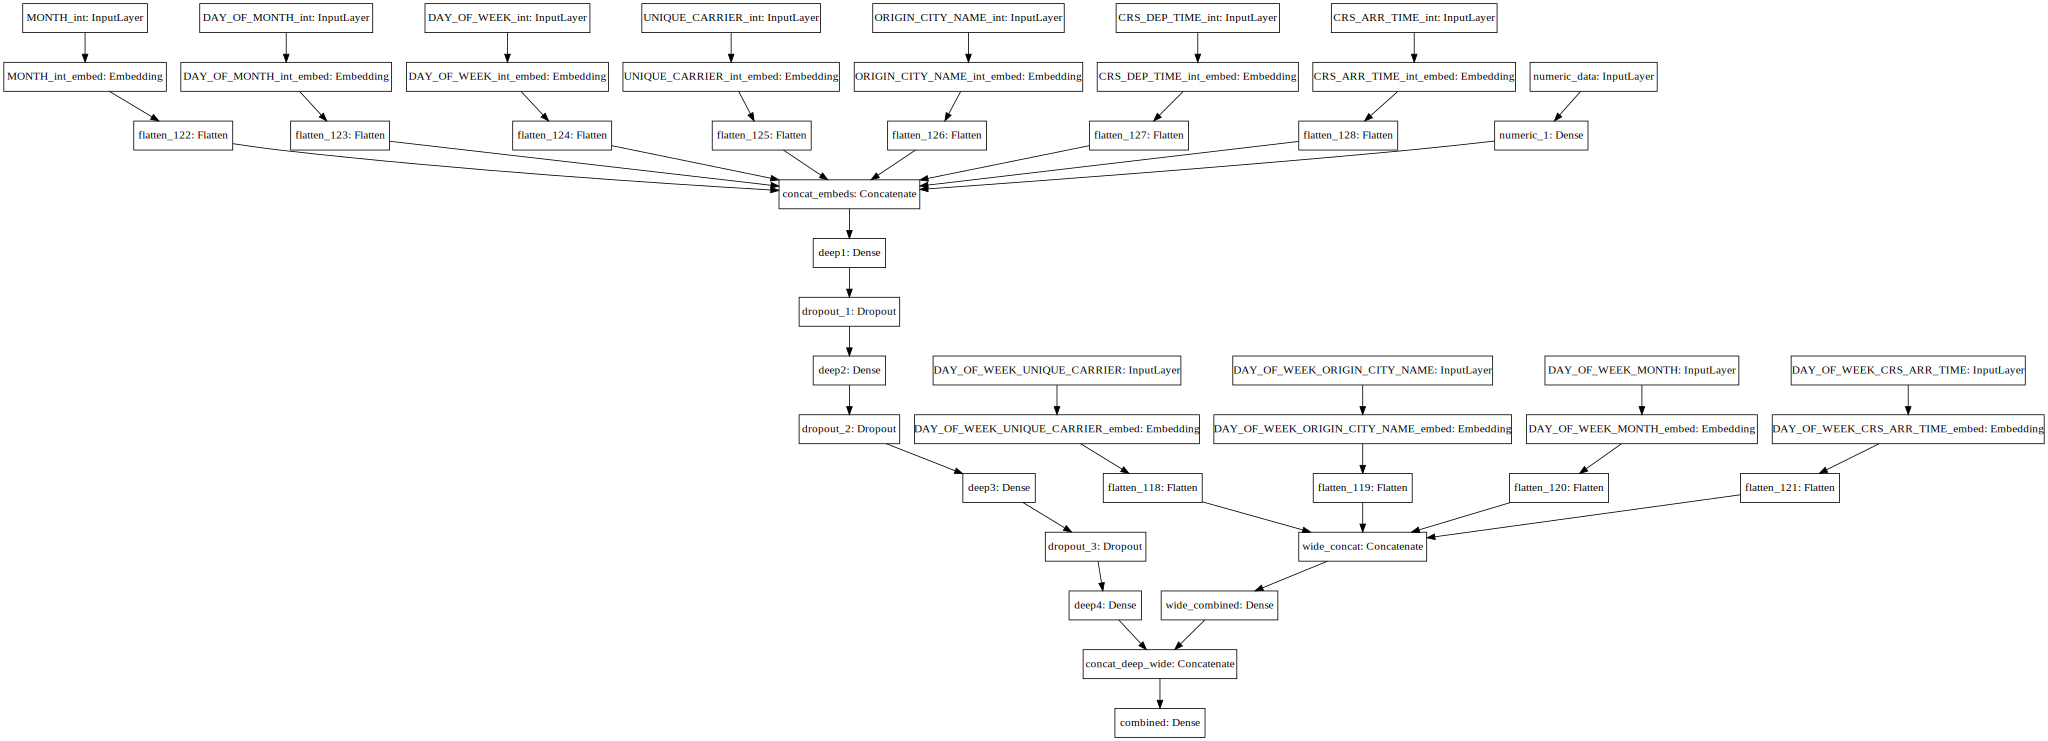

In [92]:

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

# you will need to install pydot properly on your machine to get this running
SVG(model_to_dot(model_2_layer1).create(prog='dot', format='svg'))

### Doing k fold cross validation 

In [37]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics as mt

costs = []
kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=64)
#temp_x = X_train[feature_cols].values
#temp_x = X_ints_train+ [X_train_num]+X_ints_test + [X_test_num]
#temp_y = np.array(y_train)
#print (temp_y)
#temp_y = np.array(temp_y)
#print (temp_x.shape)
#print (temp_y.shape)
ref = 1
for train_idx, test_idx in kfold.split(X_train, y_train):
    print ('Now at step',ref,'in kfold ...')
    # build train and test samples from crossed cols and feature cols
    #print (y_train)
    
    X_train_temp = X_train.iloc[train_idx]
    y_train_temp = y_train[train_idx]
    X_test_temp = X_train.iloc[test_idx]
    y_test_temp = y_train[test_idx]
    
    #pred = np.argmax(model.predict(X_test_temp), axis=1)
    
    # take cost
    history,model,c,pred = wide_and_deep2_layer1(X_train_temp,X_test_temp,y_train_temp,y_test_temp,0,10) # last two are verbose and epochs
    costs.append(c)
    
    
    # print confusion matrix
    print(mt.confusion_matrix(y_test_temp,pred), "=>", c)
    ref+=1

print(costs)

Now at step 1 in kfold ...
[[23860   217   162]
 [ 4945   455   235]
 [ 5520   138   191]] => 0.5848759787392317
Now at step 2 in kfold ...
[[23641   272   326]
 [ 4418   770   446]
 [ 5096   251   501]] => 0.6171118769087254
Now at step 3 in kfold ...
[[23311   455   473]
 [ 4102  1085   447]
 [ 4719   468   661]] => 0.6351304522197986
Now at step 4 in kfold ...
[[23211   508   520]
 [ 4139  1073   422]
 [ 4768   437   643]] => 0.6314999741600696
[0.5848759787392317, 0.6171118769087254, 0.6351304522197986, 0.6314999741600696]


We now add another layer with 20 units

In [38]:
#STEP 3 COMBINING CROSSED LINEAR CLASSIFIER AND DEEP EMBEDING

def wide_and_deep2_layer2(X_train,X_test,y_train,y_test,v=0,epo=1):
    X_train_num =  X_train[numeric_headers].values
    X_test_num = X_test[numeric_headers].values
    
    cross_columns = [['DAY_OF_WEEK','UNIQUE_CARRIER'],
                     ['DAY_OF_WEEK', 'ORIGIN_CITY_NAME'],
                     ['DAY_OF_WEEK', 'MONTH'],
                     ['DAY_OF_WEEK', 'CRS_ARR_TIME']]

    #'workclass','education','marital_status','occupation','relationship','race','sex','country'

    # we need to create separate lists for each branch
    embed_branches = []
    X_ints_train = []
    X_ints_test = []
    all_inputs = []
    all_wide_branch_outputs = []

    for cols in cross_columns:
        # encode crossed columns as ints for the embedding
        enc = LabelEncoder()

        # create crossed labels
        X_crossed_train = X_train[cols].apply(lambda x: '_'.join(str(x)), axis=1, raw=1)
        X_crossed_test = X_test[cols].apply(lambda x: '_'.join(str(x)), axis=1, raw=1)

        enc.fit(np.hstack((X_crossed_train.values,  X_crossed_test.values)))
        X_crossed_train = enc.transform(X_crossed_train)
        X_crossed_test = enc.transform(X_crossed_test)
        X_ints_train.append( X_crossed_train )
        X_ints_test.append( X_crossed_test )

        # get the number of categories
        N = max(X_ints_train[-1]+1) # same as the max(df_train[col])

        # create embedding branch from the number of categories
        inputs = Input(shape=(1,),dtype='int32', name = '_'.join(cols))
        all_inputs.append(inputs)
        x = Embedding(input_dim=N, 
                      output_dim=int(np.sqrt(N)), 
                      input_length=1, name = '_'.join(cols)+'_embed')(inputs)
        x = Flatten()(x)
        all_wide_branch_outputs.append(x)

    # merge the branches together
    wide_branch = concatenate(all_wide_branch_outputs, name='wide_concat')
    wide_branch = Dense(units=16,activation='relu',name='wide_combined')(wide_branch)

    # reset this input branch
    all_deep_branch_outputs = []
    # add in the embeddings
    for col in categorical_headers_ints:
        # encode as ints for the embedding
        X_ints_train.append( X_train[col].values )
        X_ints_test.append( X_test[col].values )

        # get the number of categories
        N = max(X_ints_train[-1]+1) # same as the max(df_train[col])

        # create embedding branch from the number of categories
        inputs = Input(shape=(1,),dtype='int32', name=col)
        all_inputs.append(inputs)
        x = Embedding(input_dim=N, 
                      output_dim=int(np.sqrt(N)), 
                      input_length=1, name=col+'_embed')(inputs)
        x = Flatten()(x)
        all_deep_branch_outputs.append(x)

    # also get a dense branch of the numeric features
    all_inputs.append(Input(shape=(X_train_num.shape[1],),
                            sparse=False,
                            name='numeric_data'))

    x = Dense(units=20, activation='relu',name='numeric_1')(all_inputs[-1])
    all_deep_branch_outputs.append( x )

    # merge the deep branches together
    deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
    deep_branch = Dense(units=100,activation='relu', name='deep1')(deep_branch)
    deep_branch = Dropout(0.2, seed=32)(deep_branch)
    deep_branch = Dense(units=50,activation='relu', name='deep2')(deep_branch)
    deep_branch = Dropout(0.4, seed=32)(deep_branch)
    deep_branch = Dense(units=25,activation='relu', name='deep3')(deep_branch)
    deep_branch = Dropout(0.6, seed=32)(deep_branch)
    deep_branch = Dense(units=20,activation='relu', name='deep4')(deep_branch)
    deep_branch = Dropout(0.6, seed=32)(deep_branch)
    deep_branch = Dense(units=10,activation='relu', name='deep5')(deep_branch)

    final_branch = concatenate([wide_branch, deep_branch],name='concat_deep_wide')
    final_branch = Dense(units=3,activation='softmax',name='combined')(final_branch)

    model = Model(inputs=all_inputs, outputs=final_branch)
    
    model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=[f1])

    # lets also add the history variable to see how we are doing
    # and lets add a validation set to keep track of our progress
    history = model.fit(X_ints_train+ [X_train_num],
                        y_train, 
                        epochs=epo, 
                        batch_size=32, 
                        verbose=v, 
                        validation_data = (X_ints_test + [X_test_num], y_test))
    
    pred = np.round(np.argmax(model.predict(X_ints_test + [X_test_num]),axis=1))
    #print(pred,y_test)
    
    c = f1_score(y_test, pred,average = 'weighted')
    
    return history,model,c,pred

In [42]:
history_2_layer2,model_2_layer2,c_2_layer2,pred_2_layer2 = wide_and_deep2_layer2(X_train,X_test,y_train,y_test,1,10) # last two are verbose and epochs
model_2_layer2.summary()

Train on 142886 samples, validate on 35722 samples
Epoch 1/10
142886/142886 [==============================] - 50s 348us/step - loss: 0.8186 - f1: 0.5448 - val_loss: 0.8020 - val_f1: 0.5448
Epoch 2/10
142886/142886 [==============================] - 50s 349us/step - loss: 0.7934 - f1: 0.5718 - val_loss: 0.7986 - val_f1: 0.6078
Epoch 3/10
142886/142886 [==============================] - 47s 331us/step - loss: 0.7821 - f1: 0.5942 - val_loss: 0.7923 - val_f1: 0.6205
Epoch 4/10
142886/142886 [==============================] - 51s 355us/step - loss: 0.7730 - f1: 0.6066 - val_loss: 0.7907 - val_f1: 0.5901
Epoch 5/10
142886/142886 [==============================] - 53s 373us/step - loss: 0.7671 - f1: 0.6121 - val_loss: 0.7831 - val_f1: 0.6214
Epoch 6/10
142886/142886 [==============================] - 61s 424us/step - loss: 0.7620 - f1: 0.6171 - val_loss: 0.7769 - val_f1: 0.6405
Epoch 7/10
142886/142886 [==============================] - 61s 429us/step - loss: 0.7575 - f1: 0.6189 - val_loss: 

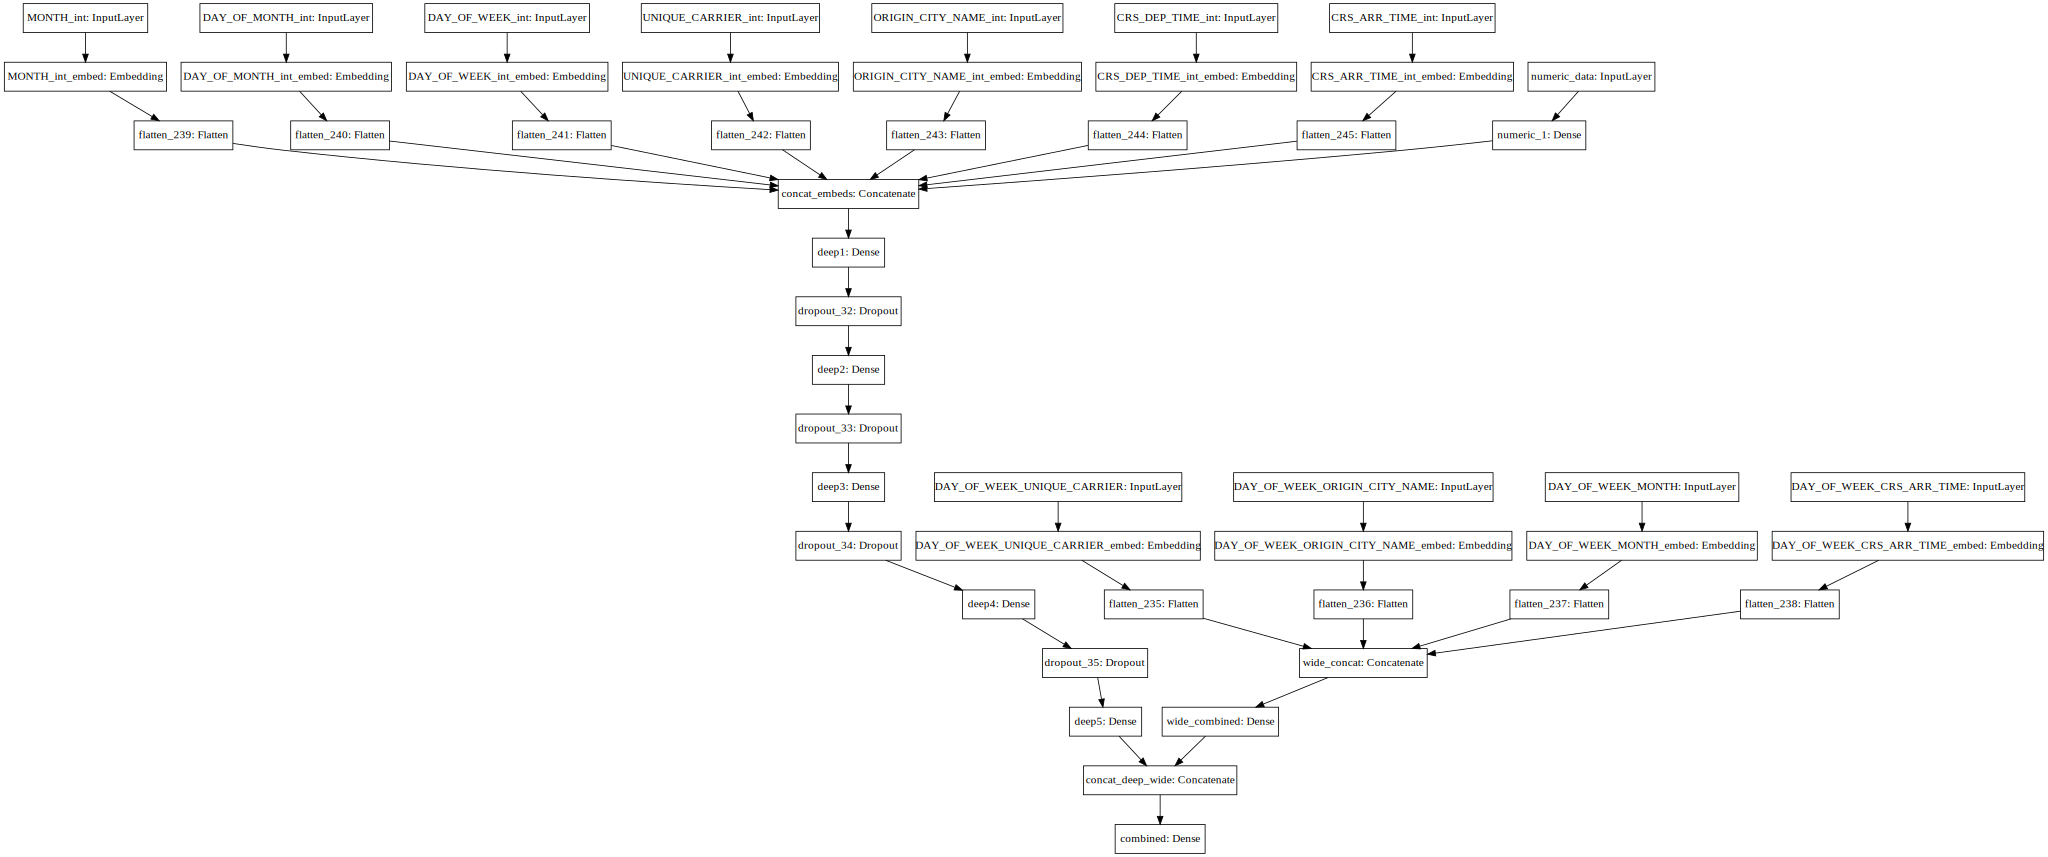

In [93]:

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

# you will need to install pydot properly on your machine to get this running
SVG(model_to_dot(model_2_layer2).create(prog='dot', format='svg'))

In [39]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics as mt

costs = []
kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=64)
#temp_x = X_train[feature_cols].values
#temp_x = X_ints_train+ [X_train_num]+X_ints_test + [X_test_num]
#temp_y = np.array(y_train)
#print (temp_y)
#temp_y = np.array(temp_y)
#print (temp_x.shape)
#print (temp_y.shape)
ref = 1
for train_idx, test_idx in kfold.split(X_train, y_train):
    print ('Now at step',ref,'in kfold ...')
    # build train and test samples from crossed cols and feature cols
    #print (y_train)
    
    X_train_temp = X_train.iloc[train_idx]
    y_train_temp = y_train[train_idx]
    X_test_temp = X_train.iloc[test_idx]
    y_test_temp = y_train[test_idx]
    
    #pred = np.argmax(model.predict(X_test_temp), axis=1)
    
    # take cost
    history,model,c,pred = wide_and_deep2_layer2(X_train_temp,X_test_temp,y_train_temp,y_test_temp,0,10) # last two are verbose and epochs
    costs.append(c)
    
    
    # print confusion matrix
    print(mt.confusion_matrix(y_test_temp,pred), "=>", c)
    ref+=1

print(costs)

Now at step 1 in kfold ...
[[23219   662   358]
 [ 4309   970   356]
 [ 4922   438   489]] => 0.6182532655298902
Now at step 2 in kfold ...
[[23456   473   310]
 [ 4263   989   382]
 [ 4873   410   565]] => 0.6277319902275871
Now at step 3 in kfold ...
[[22809   974   456]
 [ 4057  1189   388]
 [ 4698   636   514]] => 0.6225457061031844
Now at step 4 in kfold ...
[[23677   322   240]
 [ 4581   698   355]
 [ 5299   210   339]] => 0.6044122914591207
[0.6182532655298902, 0.6277319902275871, 0.6225457061031844, 0.6044122914591207]


Text(0.5,0,'epochs')

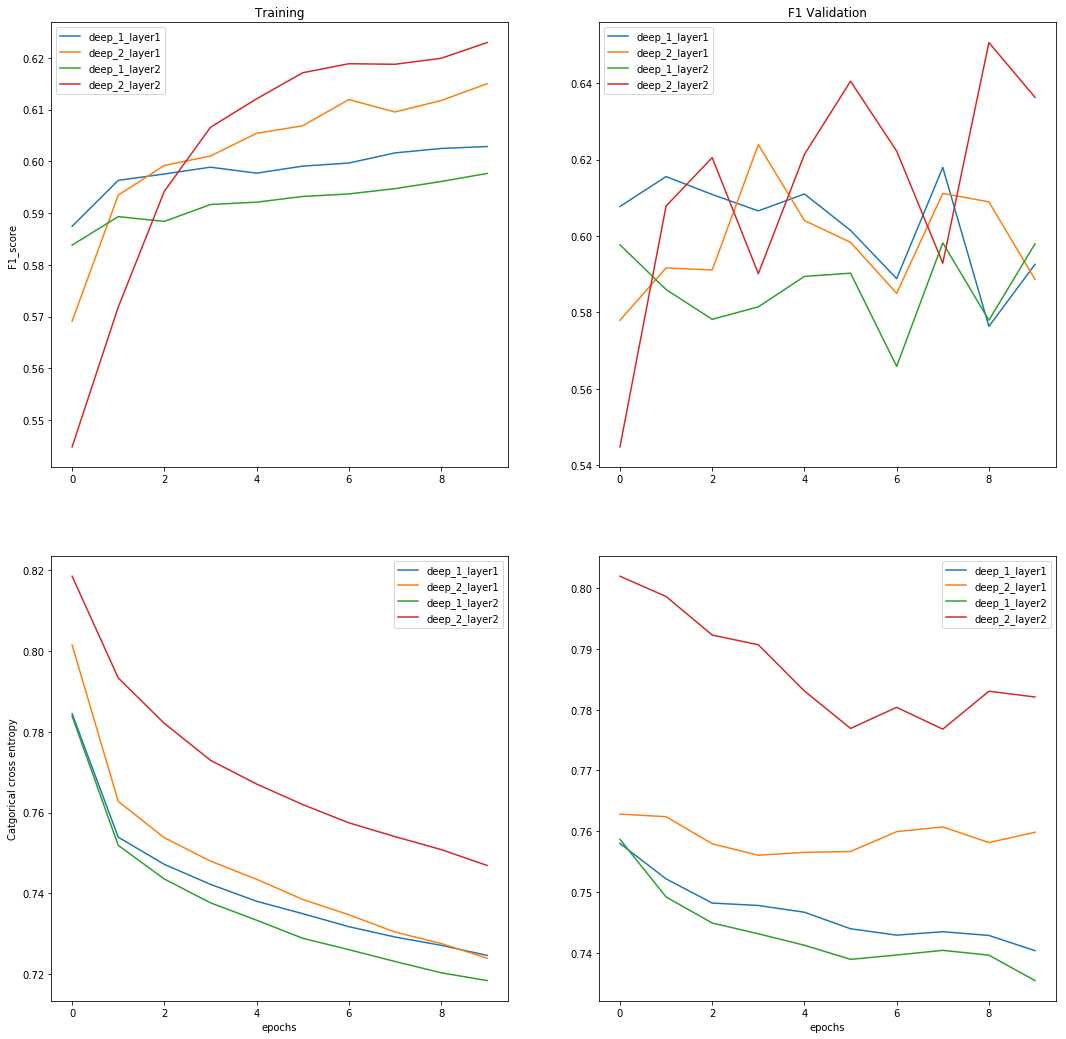

In [47]:
from matplotlib import pyplot as plt

%matplotlib inline
legends=['deep_1_layer1','deep_2_layer1','deep_1_layer2','deep_2_layer2']

plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(history_1.history['f1'])
plt.plot(history_2.history['f1'])
plt.plot(history_1_layer2.history['f1'])
plt.plot(history_2_layer2.history['f1'])
plt.legend(legends)

plt.ylabel('F1_score')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history_1_layer1.history['val_f1'])
plt.plot(history_2_layer2.history['val_f1'])
plt.plot(history_1_layer2.history['val_f1'])
plt.plot(history_2_layer2.history['val_f1'])
plt.legend(legends)
plt.title('F1 Validation')

plt.subplot(2,2,3)
plt.plot(history_1_layer1.history['loss'])
plt.plot(history_2_layer2.history['loss'])
plt.plot(history_1_layer2.history['loss'])
plt.plot(history_2_layer2.history['loss'])
plt.ylabel('Catgorical cross entropy')
plt.legend(legends)
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history_1_layer1.history['val_loss'])
plt.plot(history_2_layer2.history['val_loss'])
plt.plot(history_1_layer2.history['val_loss'])
plt.plot(history_2_layer2.history['val_loss'])
plt.legend(legends)
plt.xlabel('epochs')

As you see F1 score (which is our evaluation metric) is increasing and after 5 epochs it is close the final value for the training plot(the top left plot). F1 score in the test set is very close to the F1 score of the training set which means our model is not over trained(the top right plot). The overall f1 score is around 0.62.

<i><b>[10 points]</b> Compare the performance of your best wide and deep network to a standard multi-layer perceptron (MLP). For classification tasks, use the receiver operating characteristic and area under the curve. For regression tasks, use Bland-Altman plots and residual variance calculations.  Use proper statistical method to compare the performance of different models.  </i>

We compared kfold cross-validations of designed networks. Mean of the four folds for these netowrks were 0.6494, 0.64840, 0.6172, and 0.6182 for Deep1_Layer1, Deep1_Layer2, Deep2_Layer1, and Deep2_Layer2 respectively. Therefore the Deep1_Layer1 is the best network using F1-Score to validat test data. In the following we have compared the best network (Deep1_Layer1) with MLP network using Receiver Operating Characteristic (ROC) and the area under the curve to compare performance of these networks. Instead of comparing the ROC, we are comparing the 1-ROC (It is easier to see which model is performing worse).

Later on, we also test the f1 score between these two models (we also 1 - f1 do see which model is performing worse). 

In [87]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)



#STEP 3 COMBINING CROSSED LINEAR CLASSIFIER AND DEEP EMBEDING
from sklearn.metrics import accuracy_score, roc_auc_score
def wide_and_deep1_layer1(X_train,X_test,y_train,y_test,v=0,epo=1):
    X_train_num =  X_train[numeric_headers].values
    X_test_num = X_test[numeric_headers].values
    
    cross_columns = [['DAY_OF_WEEK','UNIQUE_CARRIER'],
                     ['DAY_OF_WEEK', 'ORIGIN_CITY_NAME']]

    #'workclass','education','marital_status','occupation','relationship','race','sex','country'

    # we need to create separate lists for each branch
    embed_branches = []
    X_ints_train = []
    X_ints_test = []
    all_inputs = []
    all_wide_branch_outputs = []

    for cols in cross_columns:
        # encode crossed columns as ints for the embedding
        enc = LabelEncoder()

        # create crossed labels
        X_crossed_train = X_train[cols].apply(lambda x: '_'.join(str(x)), axis=1, raw = True)
        X_crossed_test = X_test[cols].apply(lambda x: '_'.join(str(x)), axis=1, raw = True)

        enc.fit(np.hstack((X_crossed_train.values,  X_crossed_test.values)))
        X_crossed_train = enc.transform(X_crossed_train)
        X_crossed_test = enc.transform(X_crossed_test)
        X_ints_train.append( X_crossed_train )
        X_ints_test.append( X_crossed_test )

        # get the number of categories
        N = max(X_ints_train[-1]+1) # same as the max(df_train[col])

        # create embedding branch from the number of categories
        inputs = Input(shape=(1,),dtype='int32', name = '_'.join(cols))
        all_inputs.append(inputs)
        x = Embedding(input_dim=N, 
                      output_dim=int(np.sqrt(N)), 
                      input_length=1, name = '_'.join(cols)+'_embed')(inputs)
        x = Flatten()(x)
        all_wide_branch_outputs.append(x)

    # merge the branches together
    wide_branch = concatenate(all_wide_branch_outputs, name='wide_concat')
    wide_branch = Dense(units=16,activation='relu',name='wide_combined')(wide_branch)

    # reset this input branch
    all_deep_branch_outputs = []
    # add in the embeddings
    for col in categorical_headers_ints:
        # encode as ints for the embedding
        X_ints_train.append( X_train[col].values )
        X_ints_test.append( X_test[col].values )

        # get the number of categories
        N = max(X_ints_train[-1]+1) # same as the max(df_train[col])

        # create embedding branch from the number of categories
        inputs = Input(shape=(1,),dtype='int32', name=col)
        all_inputs.append(inputs)
        x = Embedding(input_dim=N, 
                      output_dim=int(np.sqrt(N)), 
                      input_length=1, name=col+'_embed')(inputs)
        x = Flatten()(x)
        all_deep_branch_outputs.append(x)

    # also get a dense branch of the numeric features
    all_inputs.append(Input(shape=(X_train_num.shape[1],),
                            sparse=False,
                            name='numeric_data'))

    x = Dense(units=20, activation='relu',name='numeric_1')(all_inputs[-1])
    all_deep_branch_outputs.append( x )

    # merge the deep branches together
    deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
    deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
    deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)

    final_branch = concatenate([wide_branch, deep_branch],name='concat_deep_wide')
    final_branch = Dense(units=3,activation='softmax',name='combined')(final_branch)

    model = Model(inputs=all_inputs, outputs=final_branch)
    
    model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=[f1])

    # lets also add the history variable to see how we are doing
    # and lets add a validation set to keep track of our progress
    history = model.fit(X_ints_train+ [X_train_num],
                        y_train, 
                        epochs=epo, 
                        batch_size=32, 
                        verbose=v, 
                        validation_data = (X_ints_test + [X_test_num], y_test))
    
    pred = np.round(np.argmax(model.predict(X_ints_test + [X_test_num]),axis=1))
    #print(pred,y_test)
    c = multiclass_roc_auc_score(y_test, pred)
    #c = f1_score(y_test, pred,average = 'weighted')
    
    return history,model,c,pred



from sklearn.model_selection import StratifiedKFold
from sklearn import metrics as mt

costs = []
kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=64)
#temp_x = X_train[feature_cols].values
#temp_x = X_ints_train+ [X_train_num]+X_ints_test + [X_test_num]
#temp_y = np.array(y_train)
#print (temp_y)
#temp_y = np.array(temp_y)
#print (temp_x.shape)
#print (temp_y.shape)
ref = 1
for train_idx, test_idx in kfold.split(X_train, y_train):
    print ('Now at step',ref,'in kfold ...')
    # build train and test samples from crossed cols and feature cols
    #print (y_train)
    
    X_train_temp = X_train.iloc[train_idx]
    y_train_temp = y_train[train_idx]
    X_test_temp = X_train.iloc[test_idx]
    y_test_temp = y_train[test_idx]
    
    #pred = np.argmax(model.predict(X_test_temp), axis=1)
    
    # take cost
    history,model,c,pred = wide_and_deep1_layer1(X_train_temp,X_test_temp,y_train_temp,y_test_temp,0,10) # last two are verbose and epochs
    costs.append(c)
    
    
    # print confusion matrix
    print(mt.confusion_matrix(y_test_temp,pred), "=>", c)
    ref+=1

print(costs)
eval1=costs





from sklearn.neural_network import MLPClassifier
sk_mlp = MLPClassifier(hidden_layer_sizes=(100,), 
                       solver='lbfgs', 
                       learning_rate_init=0.01, 
                       max_iter=120, 
                       random_state=1)



from sklearn.metrics import f1_score, accuracy_score, confusion_matrix


costs = []
kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=64)
for train_idx, test_idx in kfold.split(X_train[feature_cols], y_train):
    # fit on train and predict on test
    sk_mlp.fit(X_train[feature_cols].values[train_idx], y_train[train_idx])
    pred_sk = sk_mlp.predict(X_train[feature_cols].values[test_idx])
    
    # take cost
    c = multiclass_roc_auc_score(y_train[test_idx], pred_sk)
    costs.append(c)
    
    # print confusion matrix
    print(confusion_matrix(y_train[test_idx],pred_sk), "=>", c)

print(costs)
eval2 = costs

Now at step 1 in kfold ...
[[23450   429   360]
 [ 3988  1339   308]
 [ 4702   521   626]] => 0.5835763980511169
Now at step 2 in kfold ...
[[23336   368   535]
 [ 4011  1184   439]
 [ 4566   411   871]] => 0.5860578116234033
Now at step 3 in kfold ...
[[23074   398   767]
 [ 3872  1315   447]
 [ 4395   494   959]] => 0.593174400651516
Now at step 4 in kfold ...
[[23444   361   434]
 [ 4029  1255   350]
 [ 4689   471   688]] => 0.5824050696784586
[0.5835763980511169, 0.5860578116234033, 0.593174400651516, 0.5824050696784586]
[[24236     3     0]
 [ 5627     7     1]
 [ 5849     0     0]] => 0.5002803180800928
[[24228    11     0]
 [ 5622    10     2]
 [ 5840     8     0]] => 0.5003940880881658
[[24184    55     0]
 [ 5603    30     1]
 [ 5831    17     0]] => 0.5008016107203018
[[24197    42     0]
 [ 5614    20     0]
 [ 5833    14     1]] => 0.5005291850139092
[0.5002803180800928, 0.5003940880881658, 0.5008016107203018, 0.5005291850139092]


In [88]:
k = 4
t = 2.353/np.sqrt(10) # here we are approximating the bounds using the folds of the cross validation to get mean and variance, t = 1/k^-1 * t(1-.05(1-alpha), 9(n-1 degree of freedom))
#e = (1-eval1)-(1-eval2)
e1= [1-i for i in eval1]
e2 = [1-i for i in eval2]
e= []
for i in range(len(e1)):
    e.append(e1[i]-e2[i])
stdtot = np.std(e)
dbar = np.mean(e)
print('Model1 vs Model2 range:', dbar-t*stdtot, dbar+t*stdtot)
print('We can say Model 1 and Model 2 are different with greater than 95% confidence')
print('Model 1 has statisticaly the better performance and statistically significant with 95% confidence since the CI is all negative')

Model1 vs Model2 range: -0.08879904209757564 -0.08280519695343705
We can say Model 1 and Model 2 are different with greater than 95% confidence
Model 1 has statisticaly the better performance and statistically significant with 95% confidence since the CI is all negative


Previously we are generating the ROC value. For the code shows on belowing, we will perform the same stuff with f1 score.

In [83]:
# our best model
costs = []
kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=64)
#temp_x = X_train[feature_cols].values
#temp_x = X_ints_train+ [X_train_num]+X_ints_test + [X_test_num]
#temp_y = np.array(y_train)
#print (temp_y)
#temp_y = np.array(temp_y)
#print (temp_x.shape)
#print (temp_y.shape)
ref = 1
for train_idx, test_idx in kfold.split(X_train, y_train):
    print ('Now at step',ref,'in kfold ...')
    # build train and test samples from crossed cols and feature cols
    #print (y_train)
    
    X_train_temp = X_train.iloc[train_idx]
    y_train_temp = y_train[train_idx]
    X_test_temp = X_train.iloc[test_idx]
    y_test_temp = y_train[test_idx]
    
    #pred = np.argmax(model.predict(X_test_temp), axis=1)
    
    # take cost
    history,model,c,pred = wide_and_deep1_layer1(X_train_temp,X_test_temp,y_train_temp,y_test_temp,0,10) # last two are verbose and epochs
    costs.append(c)
    
    
    # print confusion matrix
    print(mt.confusion_matrix(y_test_temp,pred), "=>", c)
    ref+=1

print(costs)

Now at step 1 in kfold ...
[[23370   406   463]
 [ 3939  1318   378]
 [ 4553   504   792]] => 0.5892653263347611
Now at step 2 in kfold ...
[[23203   354   682]
 [ 3883  1227   524]
 [ 4439   382  1027]] => 0.5935065861677606
Now at step 3 in kfold ...
[[23356   334   549]
 [ 3944  1269   421]
 [ 4623   414   811]] => 0.5873390357070717
Now at step 4 in kfold ...
[[23122   525   592]
 [ 3858  1416   360]
 [ 4465   563   820]] => 0.5920939279011753
[0.5892653263347611, 0.5935065861677606, 0.5873390357070717, 0.5920939279011753]


In [82]:

### mlp
costs = []
kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=64)
for train_idx, test_idx in kfold.split(X_train[feature_cols], y_train):
    # fit on train and predict on test
    sk_mlp.fit(X_train[feature_cols].values[train_idx], y_train[train_idx])
    pred_sk = sk_mlp.predict(X_train[feature_cols].values[test_idx])
    
    # take cost
    c = f1_score(y_train[test_idx], pred_sk, average='weighted')
    costs.append(c)   
    
    # print confusion matrix
    print(confusion_matrix(y_train[test_idx],pred_sk), "=>", c)

print(costs)
eval2 = costs

[[24236     3     0]
 [ 5627     7     1]
 [ 5849     0     0]] => 0.5489981320745982
[[24228    11     0]
 [ 5622    10     2]
 [ 5840     8     0]] => 0.5492149062742631
[[24184    55     0]
 [ 5603    30     1]
 [ 5831    17     0]] => 0.5499700509990569
[[24197    42     0]
 [ 5614    20     0]
 [ 5833    14     1]] => 0.5495376500662527
[0.5489981320745982, 0.5492149062742631, 0.5499700509990569, 0.5495376500662527]


In [86]:
eval1 = costs
k = 4
t = 2.353/np.sqrt(10) # here we are approximating the bounds using the folds of the cross validation to get mean and variance, t = 1/k^-1 * t(1-.05(1-alpha), 9(n-1 degree of freedom))
#e = (1-eval1)-(1-eval2)
e1= [1-i for i in eval1] #we did 1 minus the eval. So lower the better.
e2 = [1-i for i in eval2]
e= []
for i in range(len(e1)):
    e.append(e1[i]-e2[i])
stdtot = np.std(e)
dbar = np.mean(e)
print('Model1 vs Model2 range:', dbar-t*stdtot, dbar+t*stdtot)
print('We can say Model 1 and Model 2 are different with greater than 95% confidence')
print('Model 1 has statisticaly the better performance and statistically significant with 95% confidence')

Model1 vs Model2 range: -0.043051348971686665 -0.03919071937661228
We can say Model 1 and Model 2 are different with greater than 95% confidence
Model 1 has statisticaly the better performance and statistically significant with 95% confidence


## Exceptional Work

<i><b>[10 points]</b> One idea (required for 7000 level students): Capture the embedding weights from the deep network and (if needed) perform t-SNE clustering on the output of these embedding layers. That is, pass the observations into the network, save the embedded weights (called embeddings), and then perform  dimensionality reduction in order to visualize results. Visualize and explain any clusters in the data.</i>

# Visualize weights with t_SNE

t-SNE is a dimension reduction technique to visualize different datasets. We can reduce number of dimensions to smaller numbers to have a good understanding about behavior of the data. This is done with considering similar points as nearby points and dissimilar points with distant points with high probability. We captured the embedding weights (called embeddings), then reduced their number of dimension to two using t-SNE dimension reduction from SKLearn. Now all the outputs of these embedding layers have two dimension and could be drawn in a two dimensional graph. These embedding weights are visualiszed in the following.

## t-SNE on the best model

In [51]:
embedded = [x+'_embed' for x in categorical_headers_ints]
X_emb =[]
for col in embedded:
    print (col)
    X_emb.append(model_1_layer1.get_layer(col).get_weights()[0])
    print (X_emb[-1].shape)

print (len(X_emb))

MONTH_int_embed
(12, 3)
DAY_OF_MONTH_int_embed
(31, 5)
DAY_OF_WEEK_int_embed
(7, 2)
UNIQUE_CARRIER_int_embed
(9, 3)
ORIGIN_CITY_NAME_int_embed
(131, 11)
CRS_DEP_TIME_int_embed
(23, 4)
CRS_ARR_TIME_int_embed
(24, 4)
7


In [52]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 30, n_iter = 3000)
tsne_results = []
for i in range (7):
    tsne_results.append(tsne.fit_transform(np.array(X_emb[i])))

[t-SNE] Computing 11 nearest neighbors...
[t-SNE] Indexed 12 samples in 0.000s...
[t-SNE] Computed neighbors for 12 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 12 / 12
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.979385
[t-SNE] Error after 3000 iterations: 0.288468
[t-SNE] Computing 30 nearest neighbors...
[t-SNE] Indexed 31 samples in 0.000s...
[t-SNE] Computed neighbors for 31 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 31 / 31
[t-SNE] Mean sigma: 10.498677
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.289566
[t-SNE] Error after 1200 iterations: 0.504874
[t-SNE] Computing 6 nearest neighbors...
[t-SNE] Indexed 7 samples in 0.000s...
[t-SNE] Computed neighbors for 7 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 7 / 7
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations

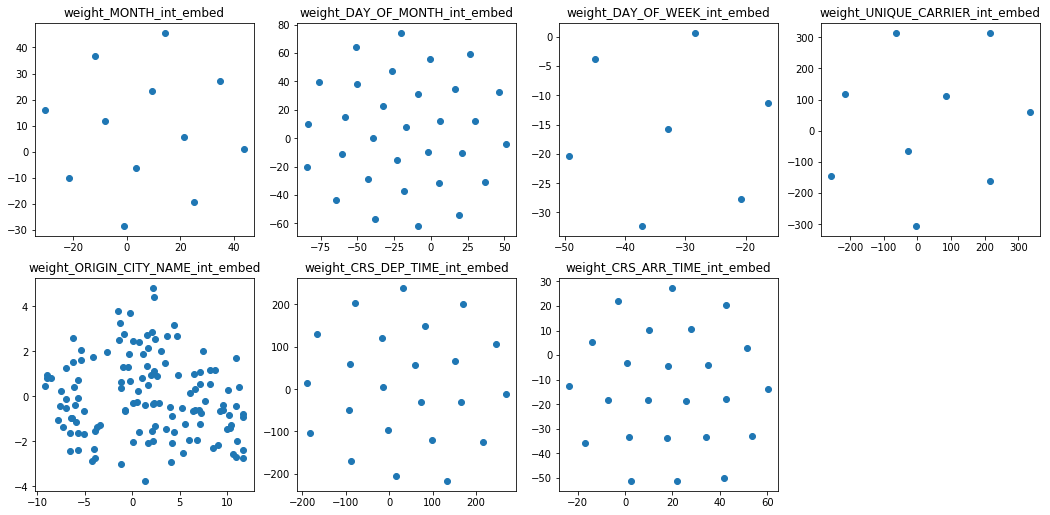

In [53]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=18
fig_size[1]=18
for i in range(len(tsne_results)):
    plt.subplot(4,4,i+1)
    temp = tsne_results[i]
    plt.scatter(temp[:,0],temp[:,1])
    plt.title('weight_'+embedded[i])
#plt.colorbar()
plt.show()

We have scattered all the weights in different cruves. These curves do not show a good clustering. It is good to see behavior of weights and compare. For instance CRS_ARR_TIME and ORIGIN_CITY_NAME are much closer compared to CARRIER and other weights. We can say these features are better classifiers.

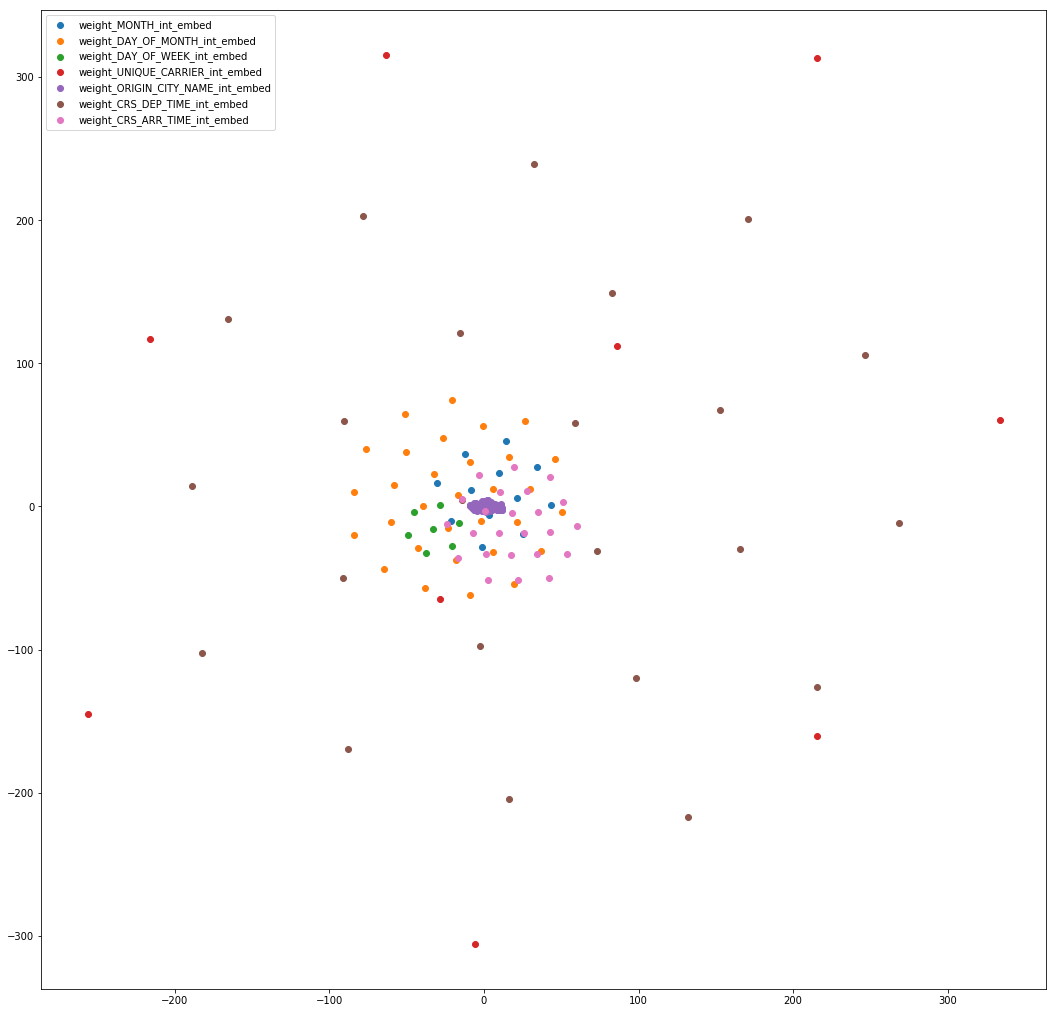

In [54]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=18
fig_size[1]=18
legends = []
for i in range(len(tsne_results)):
    #plt.subplot(4,4,i+1)
    temp = tsne_results[i]
    plt.scatter(temp[:,0],temp[:,1])
    legends.append('weight_'+embedded[i])
#plt.colorbar()
plt.legend((legends))
plt.show()

To compare weights we put all the weights in the same curve. As you see some features that mentioned before are much closer and could be clustered from others. Since this was not a good cluster when we compare all the points together we have decided to try another way to do t-SNE. Reason is that we used differen t-SNEs for each weight and we think this is not the right way to do this. To be able to use one t-SNE for all weight we changed their dimension to have the same number of columns. Since the largest weight matrix of embedding layers has 11 columns we added zeros to other weights.

As you see some of embedded features are clearly in a seperate cluster. For instance Origin City Name is shaping a dense seperate dense cluster.

## Second Method (adding zero method)

We have done the same dimension reduction on the second architecture.

In [ ]:
embedded = [x+'_embed' for x in categorical_headers_ints]
X_emb =[]
for col in embedded:
    print (col)
    X_emb.append(model_2.get_layer(col).get_weights()[0])
    print (X_emb[-1].shape)

print (len(X_emb))

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 30, n_iter = 300)
tsne_results = []
for i in range (7):
    tsne_results.append(tsne.fit_transform(np.array(X_emb[i])))

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=18
fig_size[1]=18
for i in range(len(tsne_results)):
    plt.subplot(4,4,i+1)
    temp = tsne_results[i]
    plt.scatter(temp[:,0],temp[:,1])
    plt.title('weight_'+embedded[i])
#plt.colorbar()
plt.show()

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=18
fig_size[1]=18
legends = []
for i in range(len(tsne_results)):
    #plt.subplot(4,4,i+1)
    temp = tsne_results[i]
    plt.scatter(temp[:,0],temp[:,1])
    legends.append('weight_'+embedded[i])
#plt.colorbar()
plt.legend((legends))
plt.show()

In [66]:
embedded = [x+'_embed' for x in categorical_headers_ints]
X_emb =[]
y_emb = []
count = 0
for col in embedded:
    print (col)
    l1 = model_1.get_layer(col).get_weights()[0]
    l1 = np.hstack((l1,np.zeros((l1.shape[0],11-l1.shape[1]))))
    X_emb.append(l1)
    print (X_emb[-1].shape)

for ele in X_emb:
    y_emb+=[count]*ele.shape[0]
    count+=1

X_emb = np.vstack(tuple(X_emb))
y_emb = np.array(y_emb)

print (X_emb.shape,y_emb.shape)

MONTH_int_embed
(12, 11)
DAY_OF_MONTH_int_embed
(31, 11)
DAY_OF_WEEK_int_embed
(7, 11)
UNIQUE_CARRIER_int_embed
(9, 11)
ORIGIN_CITY_NAME_int_embed
(131, 11)
CRS_DEP_TIME_int_embed
(23, 11)
CRS_ARR_TIME_int_embed
(24, 11)
(237, 11) (237,)


In [67]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 40, n_iter = 3000)
tsne_results = tsne.fit_transform(X_emb)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 237 samples in 0.000s...
[t-SNE] Computed neighbors for 237 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 237 / 237
[t-SNE] Mean sigma: 0.277999
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.508675
[t-SNE] Error after 850 iterations: 0.591318


In [69]:
print('The color in the below plot are related as :')
for i in range(len(embedded)):
    print (str(i),embedded[i])
    

The color in the below plot are related as :
0 MONTH_int_embed
1 DAY_OF_MONTH_int_embed
2 DAY_OF_WEEK_int_embed
3 UNIQUE_CARRIER_int_embed
4 ORIGIN_CITY_NAME_int_embed
5 CRS_DEP_TIME_int_embed
6 CRS_ARR_TIME_int_embed


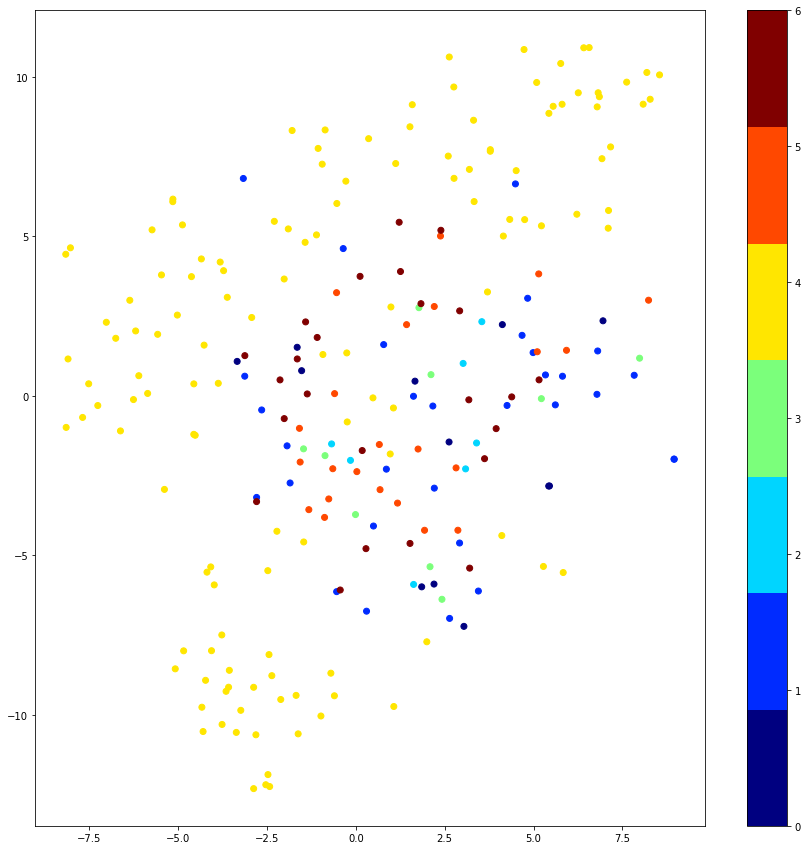

In [79]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=15
fig_size[1]=15
plt.scatter(tsne_results[:,0],tsne_results[:,1],c = y_emb, cmap = plt.cm.get_cmap('jet',7))
plt.colorbar()
plt.show()


After changing weights dimension we have used a single t-SNE to reduce their dimension from 11 to 2. These points now could be drawn in a single curve as you see in above graph. These points are color coded for each feature. You can see the color codes in above this graph. For instance ORIGIN_CITY_NAME is colored with yellow. As you see there is not a good clustering for these weights. We believe using more data with more epochs is going to make this cluster better. At first we ran this code with 3 epochs and it was almost random and when we increased it to 10 it got a lot better. Because of computational limits we were unable to increase it more but it will make these clusters much better. Having two features in different clusters it means that features in one cluster are working similarly. For instance in this graph the yello feature that is for ORIGIN_CITY_NAME is acting completely different from other features and other features with embedding are acting similarly. Therefore ORIGIN_CITY_NAME is building one cluster and all the other features with embedding are making another cluster.

## References

Most of the references are written in report when they are used. We have also used Professor Larson's codes and presentations in class alot.